In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import BytesIO
from zipfile import ZipFile
from sklearn.model_selection import train_test_split




---


#**Data Description**

**The wine dataset consists of 6497 rows and 13 columns. It includes attributes such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulfates, alcohol and quality. The quality variable represents the quality rating of the wine, ranging from 1 to 9. This dataset provides valuable information predicting wine quality based on its chemical composition.**


---



In [2]:
from google.colab import files
file = files.upload()  #upload file into google colab session
data = pd.read_csv("winequalityN.csv")
data.head()

Saving winequalityN.csv to winequalityN.csv


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6




---

#**data exploration**
**Our data exploration commenced with a thorough examination of the dataset for missing values and duplicates. We discovered some null values in certain variables and categorized the variables into either float or integer types, excluding any categorical variables.**


---






In [3]:
#Printing Shape of Data
data.shape

(6497, 13)

In [4]:
#Information of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
#Finding total ? value
data.isin(['?']).sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df = data.drop("type", axis=1)


In [7]:
#df

In [8]:
# Check the data types of columns
column_types = df.dtypes

# Iterate over each column and determine if it is numeric or categorical
for column_name, data_type in column_types.iteritems():
    if pd.api.types.is_numeric_dtype(data_type):
        print(f"Column '{column_name}' is numeric.")
    else:
        print(f"Column '{column_name}' is categorical.")

Column 'fixed acidity' is numeric.
Column 'volatile acidity' is numeric.
Column 'citric acid' is numeric.
Column 'residual sugar' is numeric.
Column 'chlorides' is numeric.
Column 'free sulfur dioxide' is numeric.
Column 'total sulfur dioxide' is numeric.
Column 'density' is numeric.
Column 'pH' is numeric.
Column 'sulphates' is numeric.
Column 'alcohol' is numeric.
Column 'quality' is numeric.


<ipython-input-8-72babd502d82>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name, data_type in column_types.iteritems():


In [9]:
# Check for null values
null_values = df.isnull().sum()
print(null_values)

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [10]:
df1 = df.dropna()

In [11]:
# Check for null values
null_values = df1.isnull().sum()
print(null_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [12]:
df1

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6491            6.8             0.620         0.08             1.9      0.068   
6492            6.2             0.600         0.08             2.0      0.090   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6491                 28.0                  38.0  0.99651  3.42       0.82   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
6491      9.5        6  
6492     10.5        5  
6494     11.0        6  
6495     10.2        5  
6496     11.0        6  

[6463 rows x 12 columns]



---

#**Visualization**

**We utilized the violin plot to further evaluate the variables in relation to the target variable. The violin plot provides valuable insights into the distribution of each variable and its variation within different target classes. Notably, the plots reveal the presence of long tails in certain classes, suggesting potential outliers or extreme values that warrant closer examination. We illustrated the distribution of the data by utilizing histograms, but they showed some variables as skewed. We also used the pairplot to assess the linearity between variables and their distribution with respect to the target variable. Upon observation, it becomes evident that the majority of the variables exhibit a linear relationship. However, a noteworthy finding is that classes 5 and 6 tend to form more distinct clusters, while class 3 displays a higher degree of spread across the plot. We employed the boxplot to delve deeper into outlier detection. The results indicate that several variables in our analysis exhibit a notable presence of outliers, highlighting the need for further investigation and consideration of their potential impact on the overall analysis.**


---



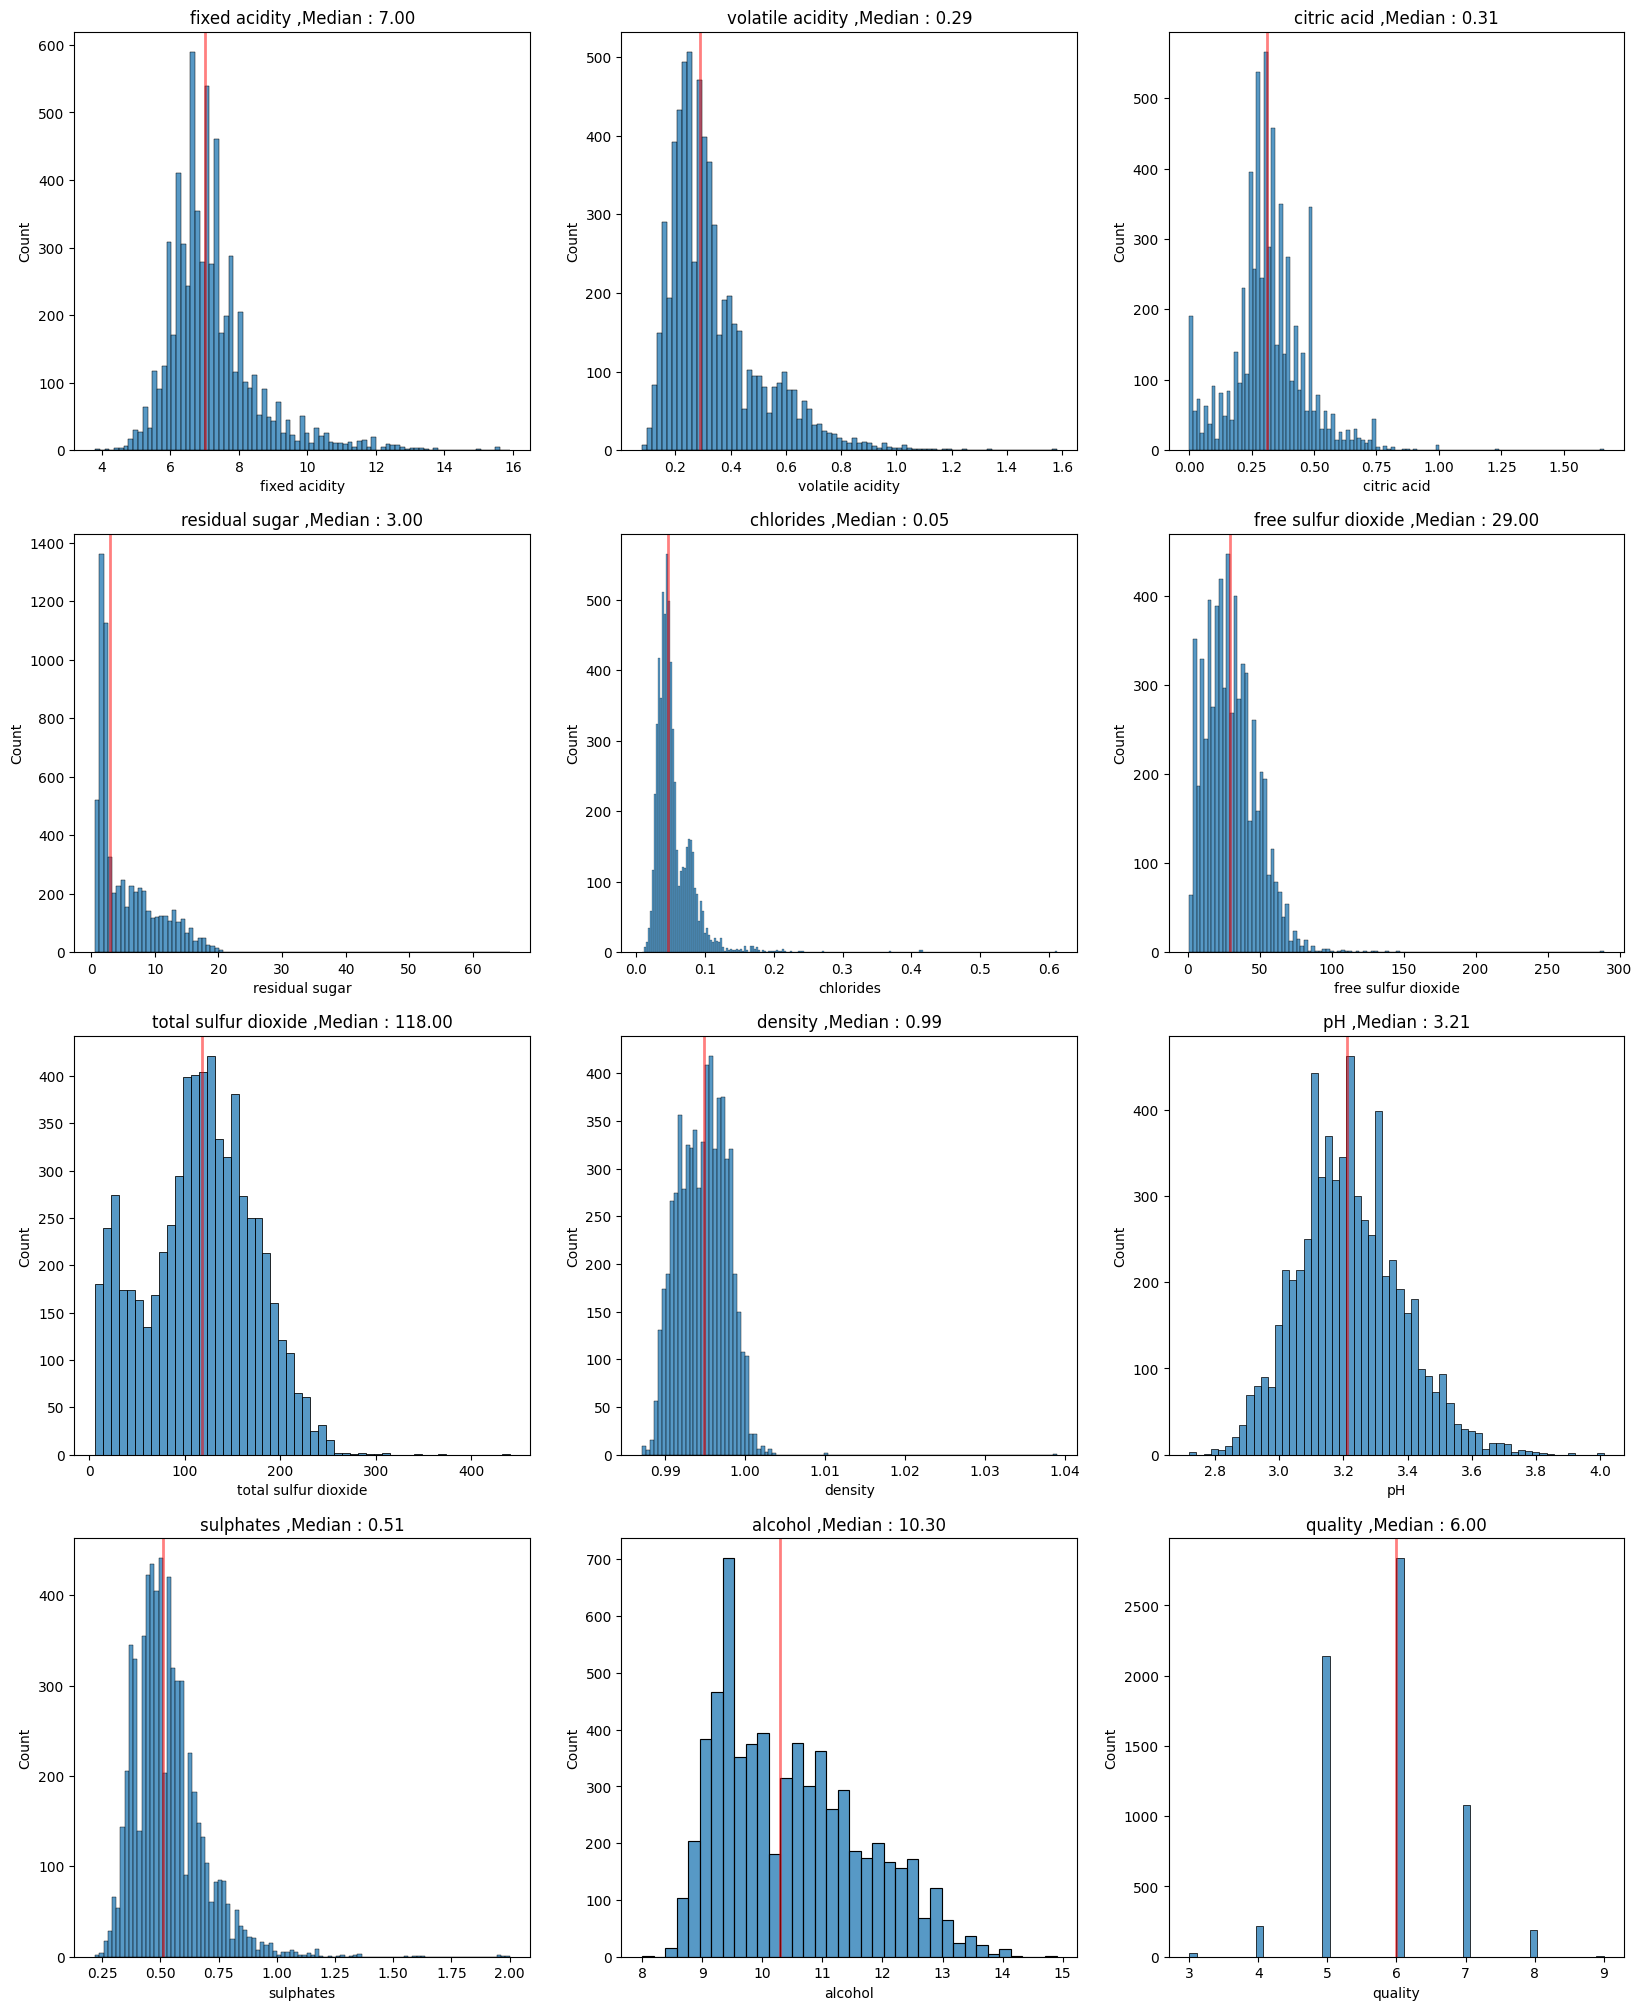

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains your DataFrame

# Selecting only the numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Creating subplots
fig, axes = plt.subplots(4, 3, figsize=(20, 25))

# Iterating through numeric columns
for feature, ax in zip(numeric_columns.columns, axes.flatten()):
    sns.histplot(data=numeric_columns[feature], ax=ax)
    median = numeric_columns[feature].median()
    ax.set_title(f'{feature} ,Median : {median:0.2f}')
    ax.axvline(median, color='red', lw=2, alpha=0.5)

plt.show()

In [14]:
skew = df.skew().to_frame()
skew.columns = ['Skewness']
skew

Skewness
fixed acidity         1.722805
volatile acidity      1.495512
citric acid           0.473032
residual sugar        1.435000
chlorides             5.399849
free sulfur dioxide   1.220066
total sulfur dioxide -0.001177
density               0.503602
pH                    0.386966
sulphates             1.798467
alcohol               0.565718
quality               0.189623

In [15]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(skew, *['Skewness'], **{})
chart

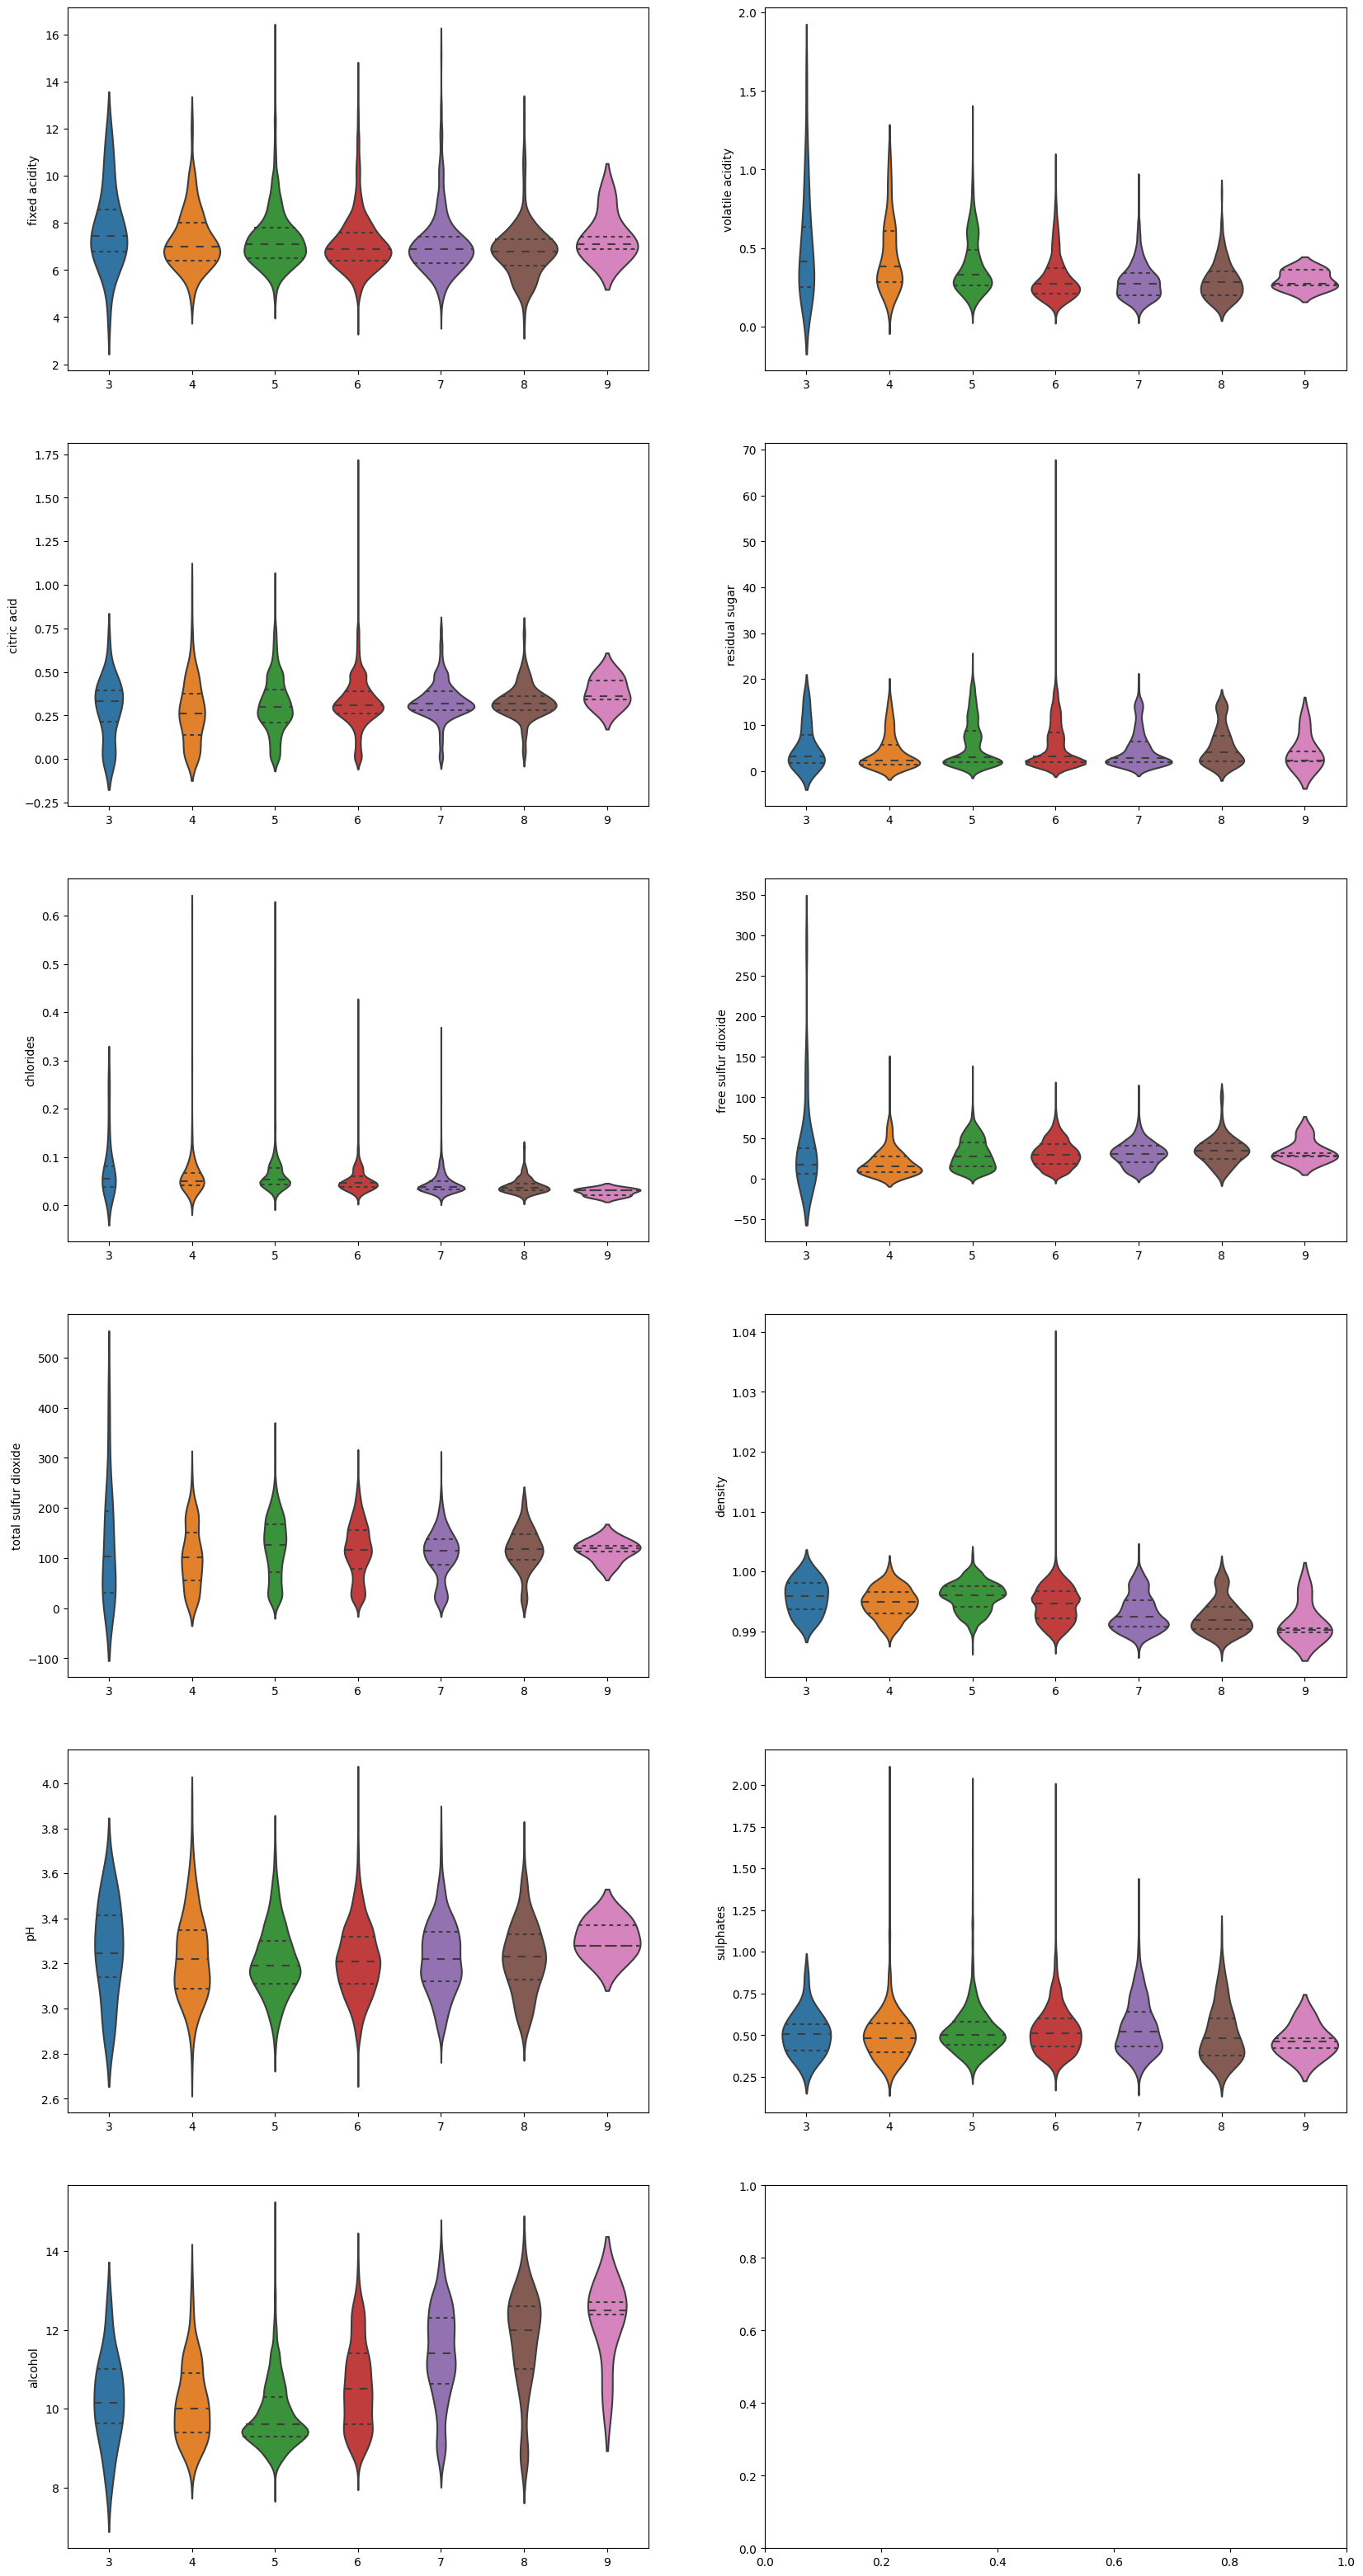

In [16]:
import seaborn as sns
fig, axes = plt.subplots(6, 2, figsize = (20, 40))
for feature, ax in zip(df1.iloc[:,:-1], axes.flatten()):
    sns.violinplot(data=df,
                   x="quality",
                   y=feature,
                   inner="quartile",
                   ax=ax)
    ax.set(xlabel=None)
plt.show()

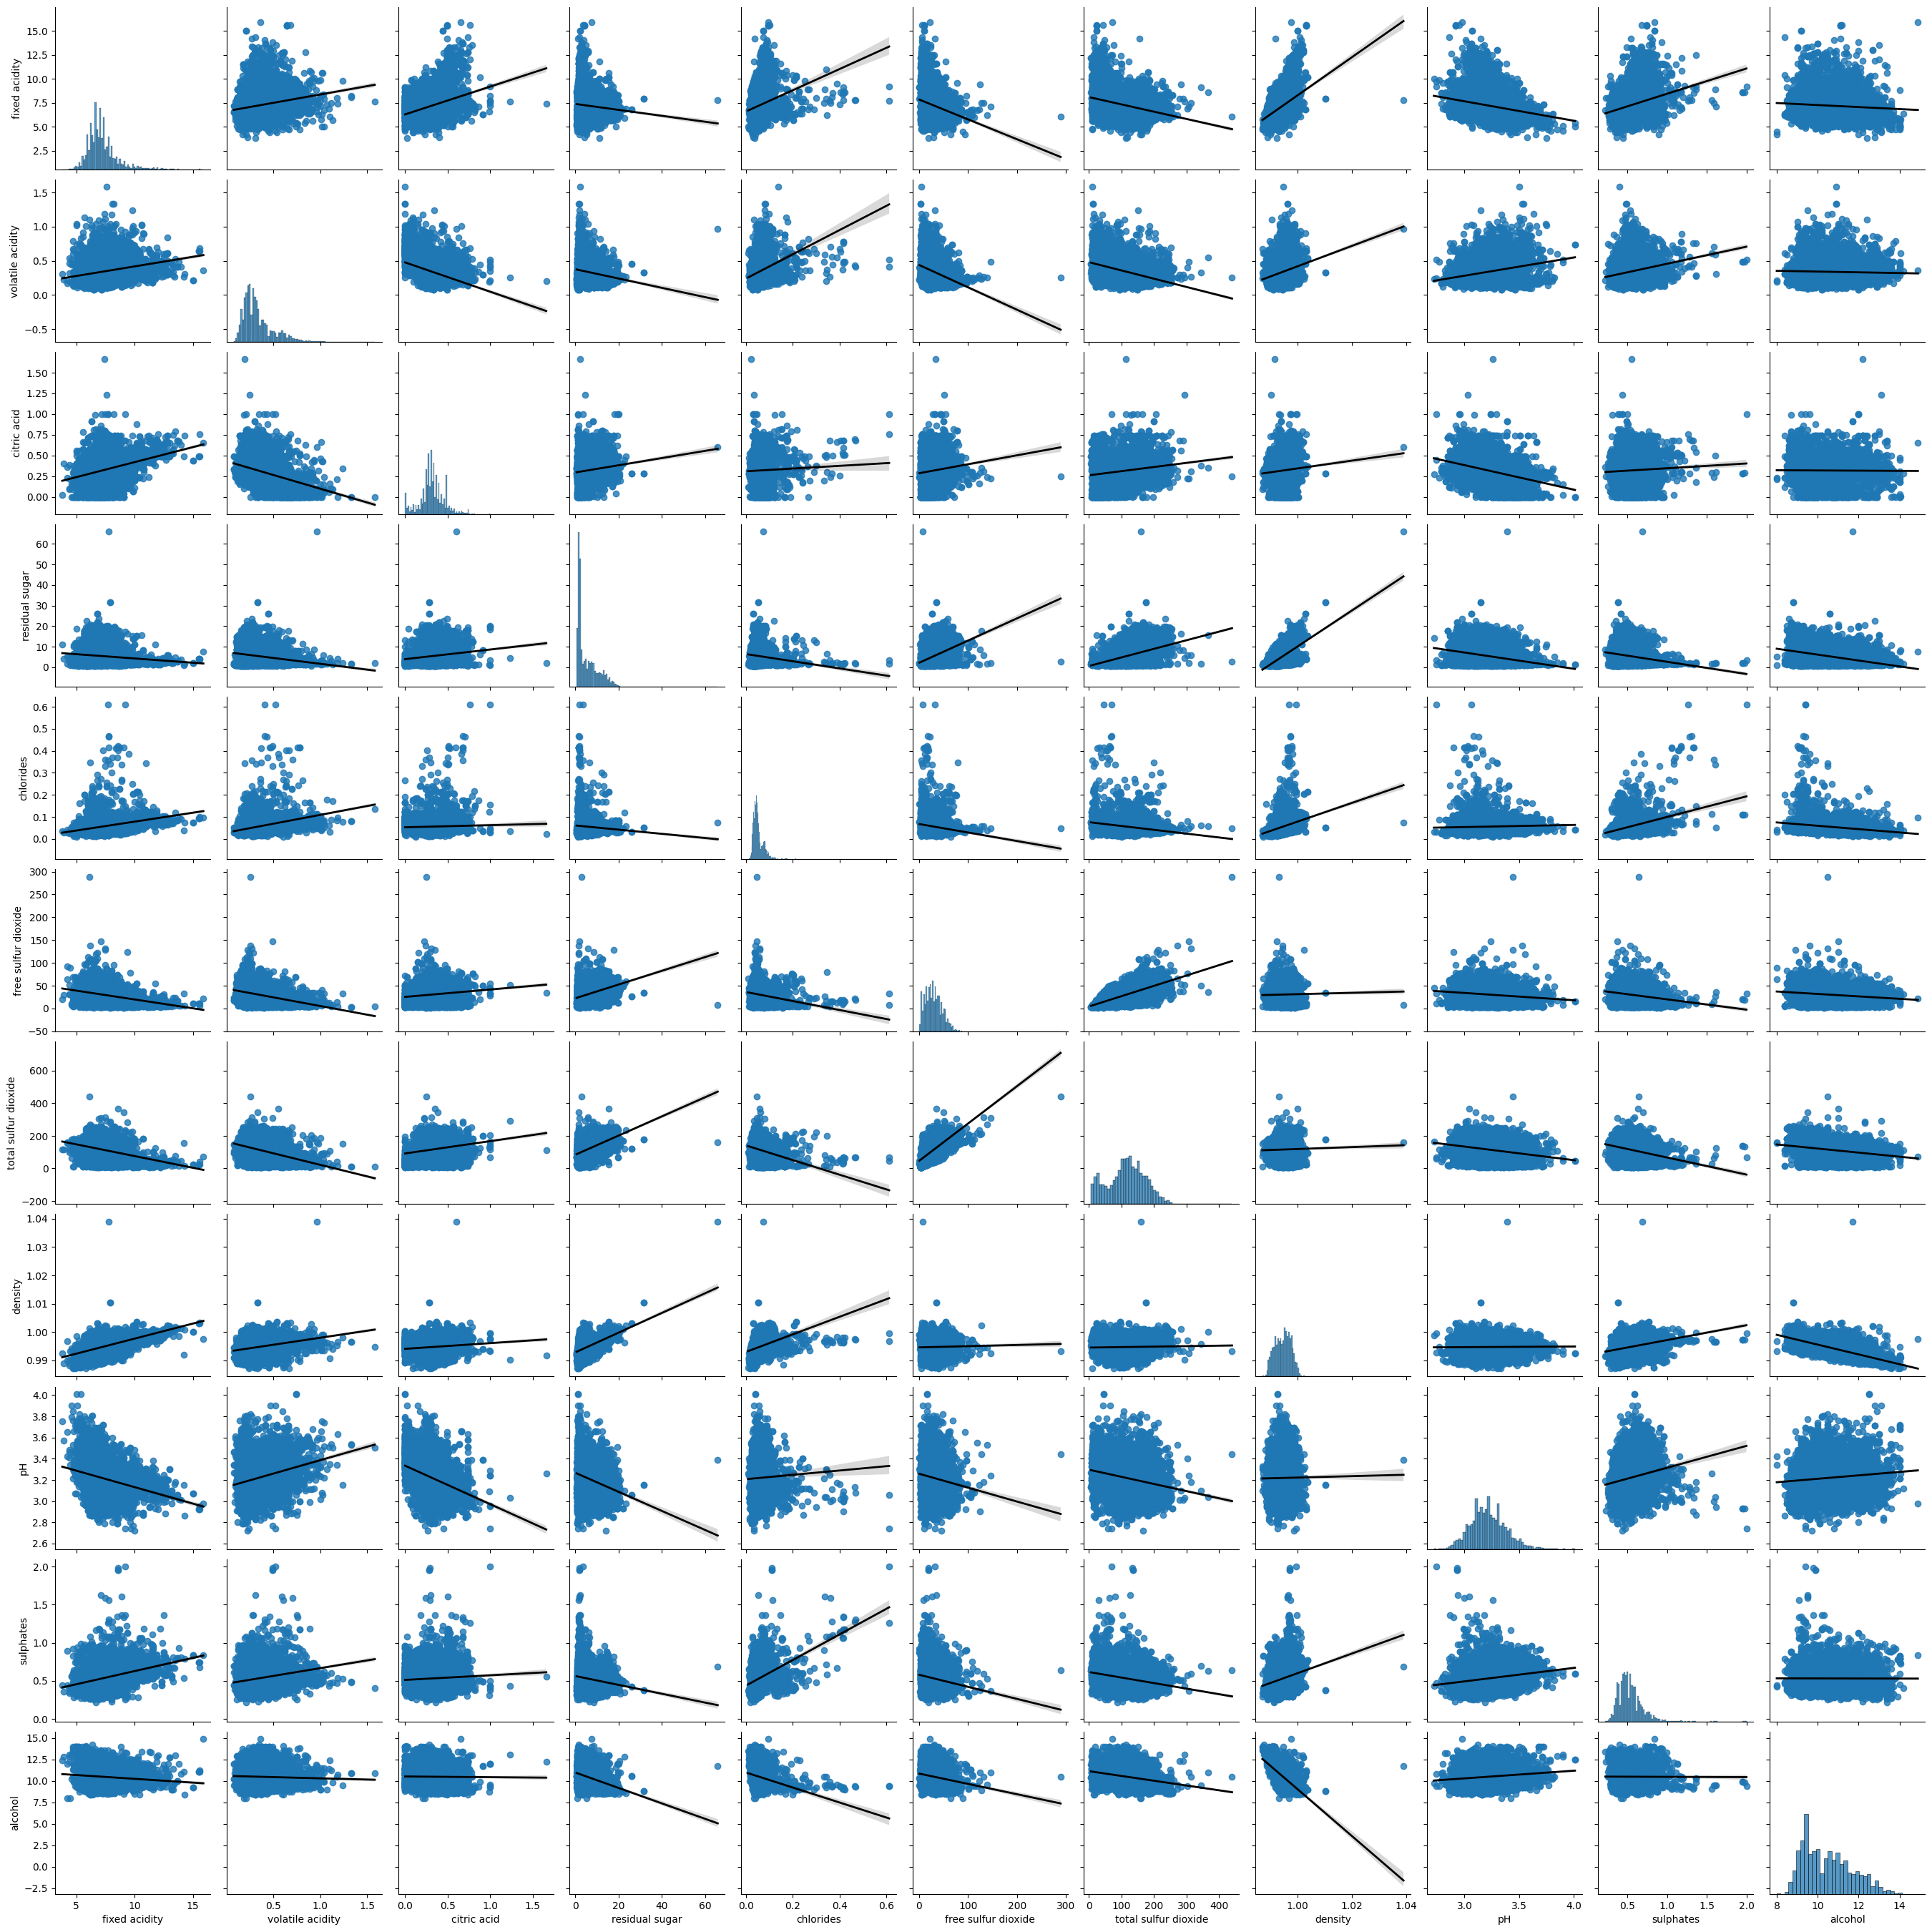

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
                   'total sulfur dioxide', 'density','pH','sulphates','alcohol']
sns.pairplot(df1[columns_to_plot], kind="reg", plot_kws={'line_kws':{'color':'black', 'lw':2}})
plt.show()


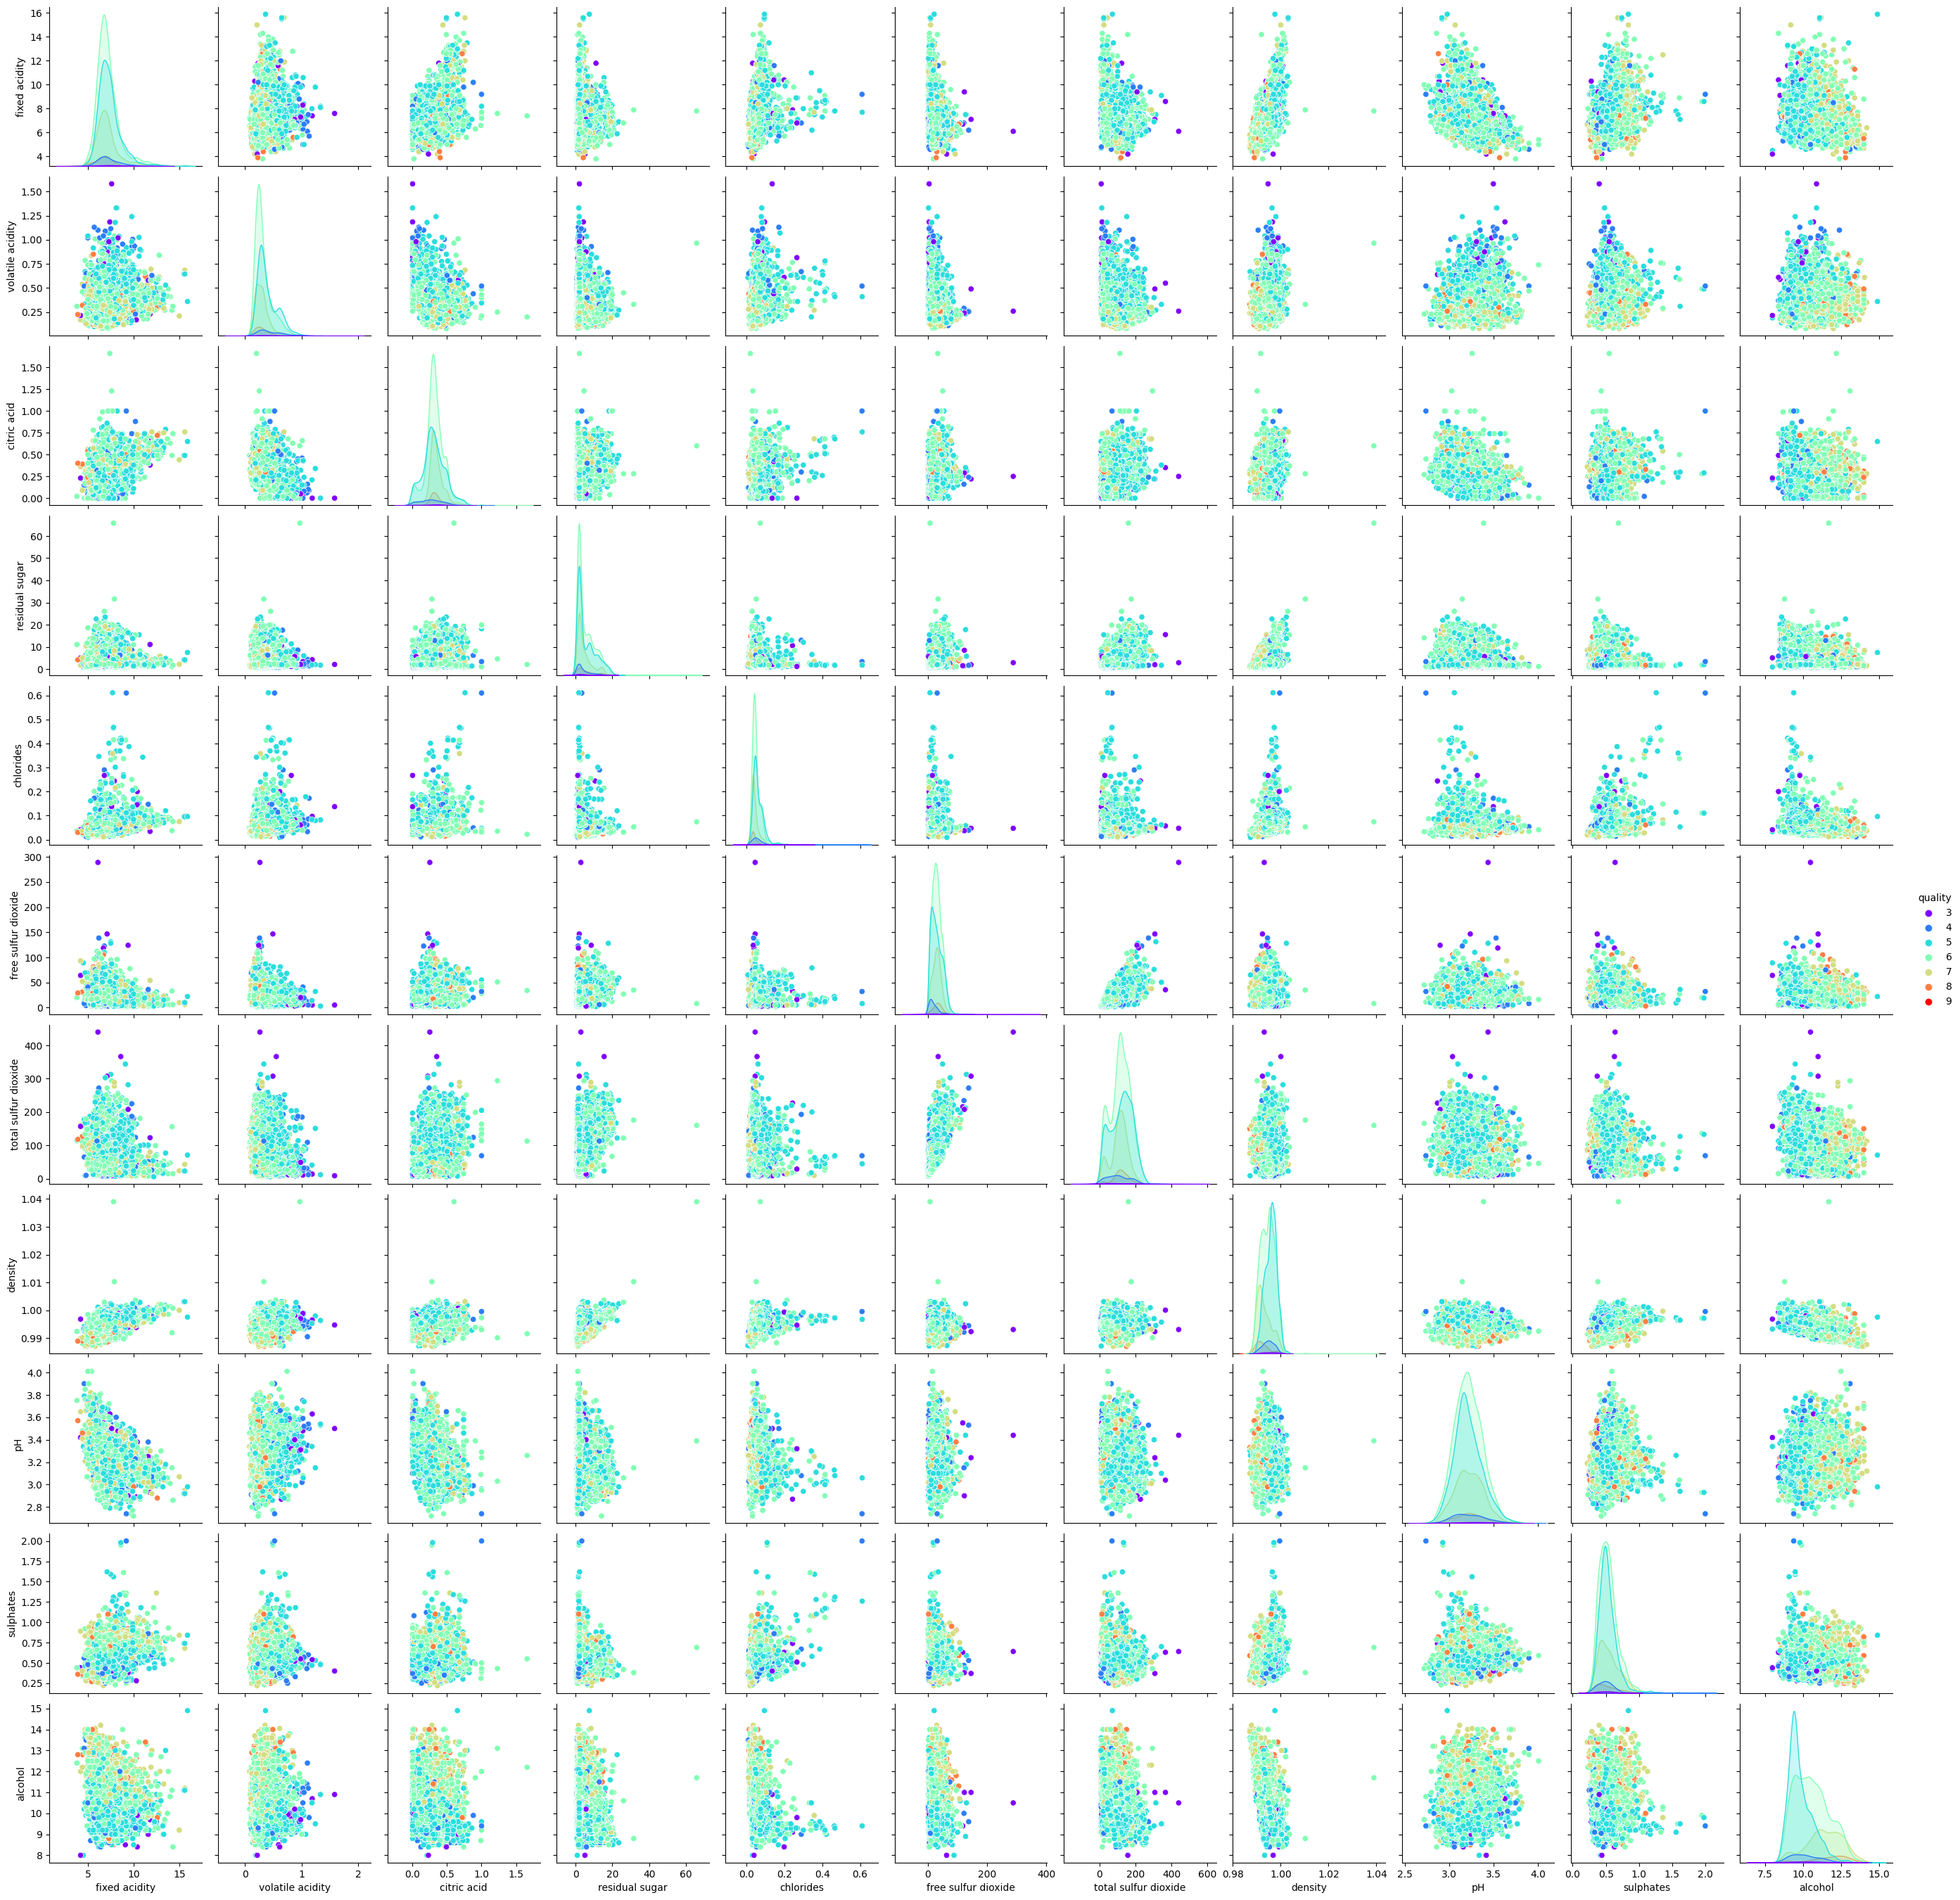

In [18]:
#df1["Class"] = df1["Class"].astype("category")

sns.pairplot(df , hue="quality", palette="rainbow")

fixed acidity - Percentage of Outliers: 5.49%
volatile acidity - Percentage of Outliers: 5.79%
citric acid - Percentage of Outliers: 7.82%
residual sugar - Percentage of Outliers: 1.82%
chlorides - Percentage of Outliers: 4.40%
free sulfur dioxide - Percentage of Outliers: 0.95%
total sulfur dioxide - Percentage of Outliers: 0.15%
density - Percentage of Outliers: 0.05%
pH - Percentage of Outliers: 1.12%
sulphates - Percentage of Outliers: 2.94%
alcohol - Percentage of Outliers: 0.05%
quality - Percentage of Outliers: 3.51%


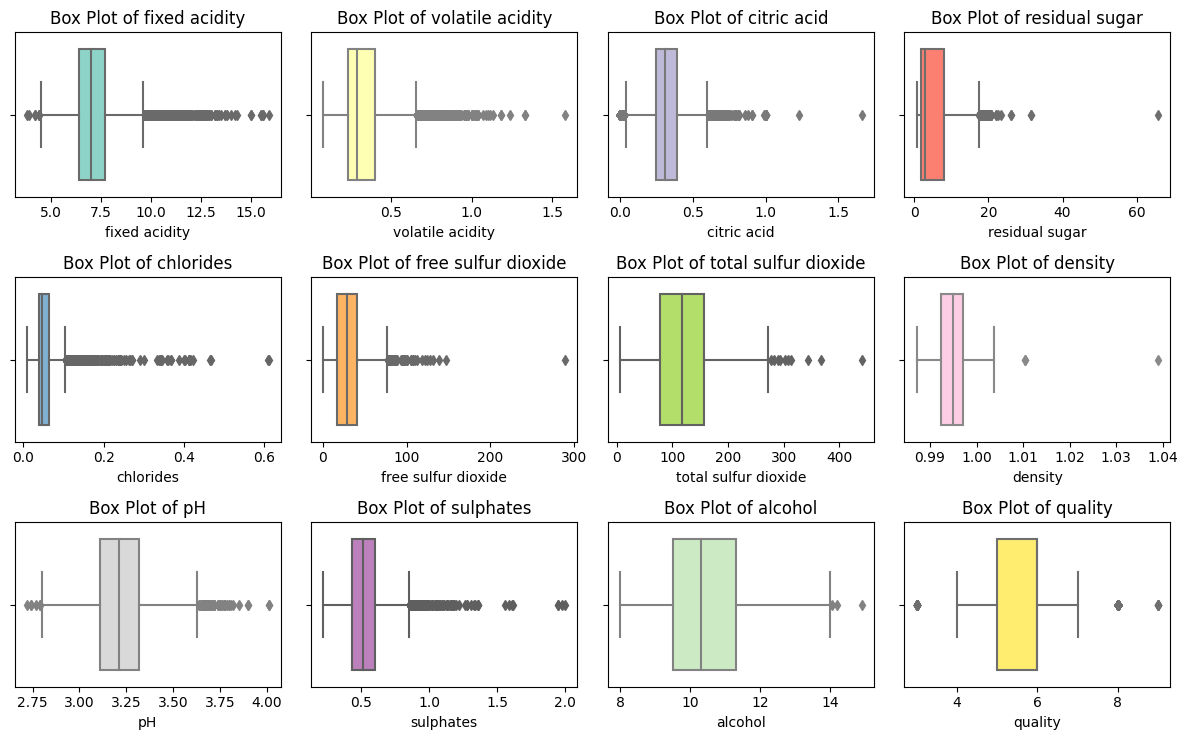

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to detect outliers using the IQR method
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

# Your DataFrame (replace df with your actual DataFrame)
# df = pd.DataFrame(...)

# Calculate the number of rows and columns for subplots
num_rows = (len(df.select_dtypes(include=['number']).columns) + 3) // 4
num_cols = min(4, len(df.select_dtypes(include=['number']).columns))

# Here, I'm using the 'Set3' palette with 12 colors to match the number of columns
palette = sns.color_palette('Set3', n_colors=len(df.select_dtypes(include=['number']).columns))

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 2.5*num_rows))

# Flatten the 2D axes array into a 1D array for easy iteration
axes = axes.flatten()

# Loop through each column and plot the box plot in the corresponding subplot
for i, column in enumerate(df.select_dtypes(include=['number']).columns):
    sns.boxplot(x=df[column], ax=axes[i], color=palette[i], boxprops=dict(facecolor=palette[i]))
    axes[i].set_title(f'Box Plot of {column}')

    # Calculate the percentage of outliers for the current column
    outliers = detect_outliers(df[column])
    percentage_outliers = (len(outliers) / len(df)) * 100
    print(f"{column} - Percentage of Outliers: {percentage_outliers:.2f}%")

#Turn off any extra axes
for ax in axes[len(df.select_dtypes(include=['number']).columns):]:
    ax.axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()




---
#**Heatmap**

**To explore relationships between variables, we utilized a heatmap, which visually displayed correlations between different features. However, we didn't find any strong relationships or overlaps between the variables, with the highest correlation of 0.68 existing between the "fixed acidity" and "density" variables.**


---



<Axes: >

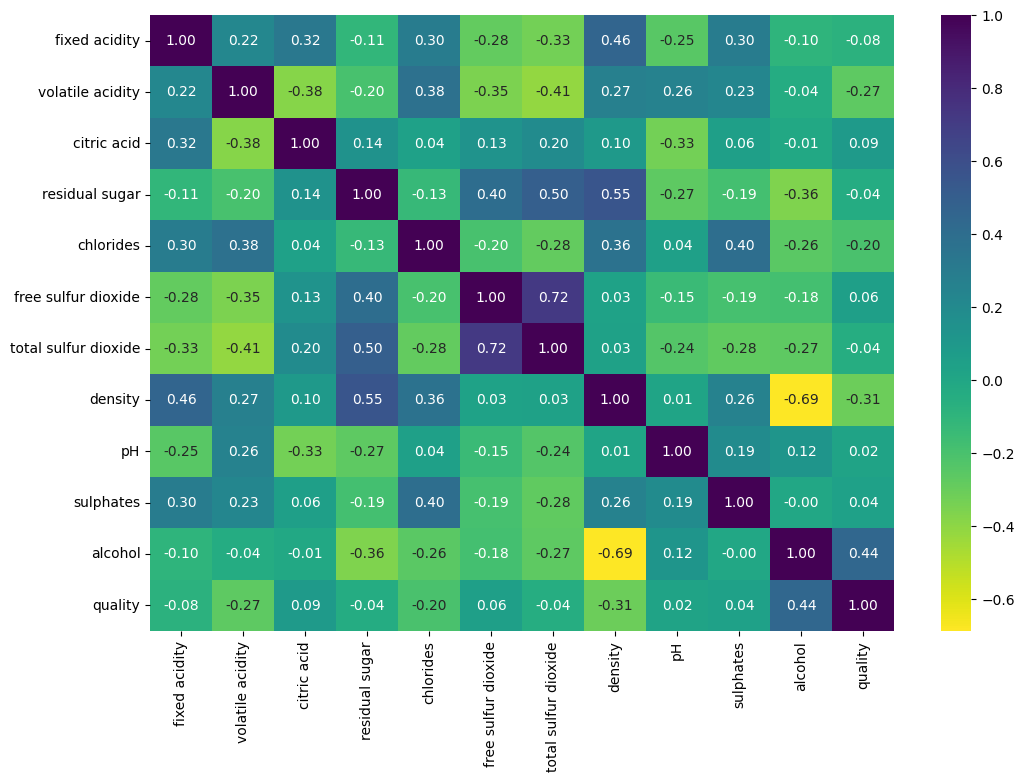

In [136]:
plt.figure(figsize = [12, 8])
sns.heatmap(df.corr(),annot = True, cmap = 'viridis_r', fmt = '.2f')



---
**Next, we closely examined the distribution of wine classes and made some interesting observations. Class 5 dominates the dataset, accounting for 42% of the instances, followed by class 6 at 40.7% and class 7 at 12.7%.**


---




<Axes: xlabel='quality', ylabel='count'>

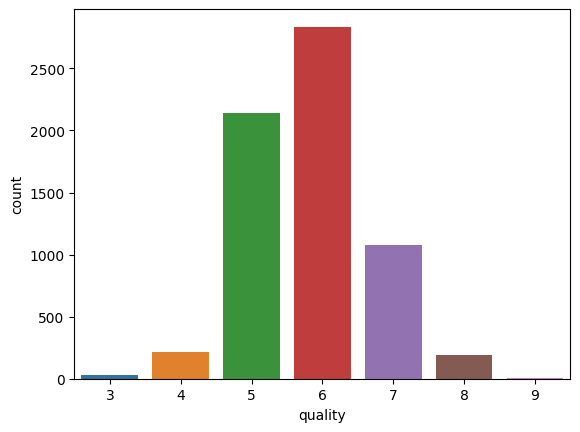

In [137]:
#count of the target variable
sns.countplot(x='quality', data=df)

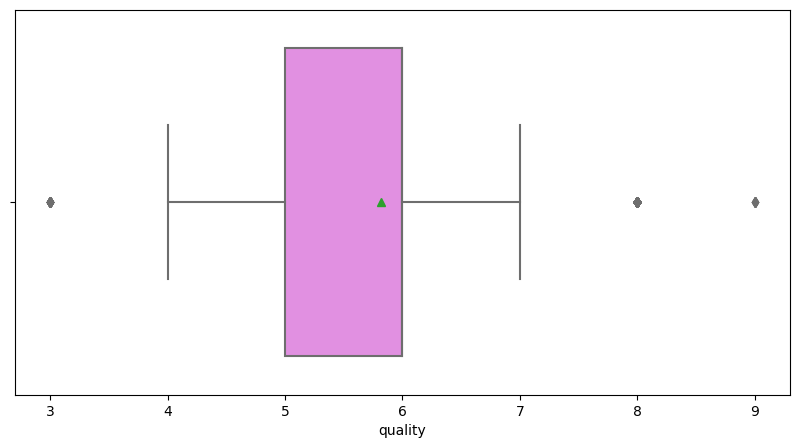

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

def boxplot_feature(feature, figsize=(10,5)):
    plt.figure(figsize=figsize)
    sns.boxplot(x=feature, showmeans=True, color='violet')
    plt.show()

# Example usage:
feature = df['quality']
boxplot_feature(feature)


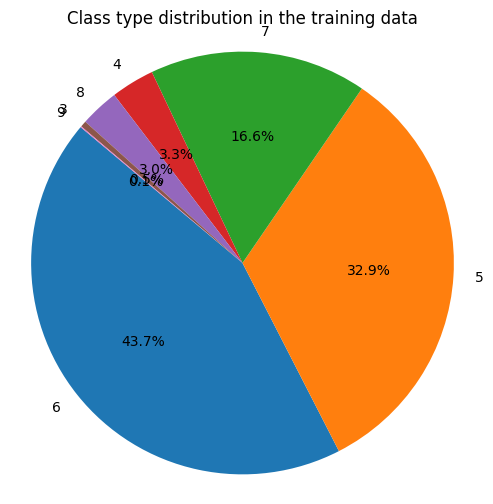

In [139]:
import matplotlib.pyplot as plt

class_counts = df["quality"].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Class type distribution in the training data")
plt.axis('equal')
# Display the pie chart
plt.show()

#**MUTUAL INFORMATION**
**Mutual information between two random variables is a non-negative quantity that quantifies the dependency between the variables. It is equal to zero if and only if the two random variables are independent of each other. A higher value of mutual information indicates a stronger dependency between the variables. In a specific observation, "PH" and "sulphates" were found to have the lowest mutual information scores with the target variable, suggesting that they are less likely to be dependent on it.**

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1:]

In [141]:
def select_feature_f(X_train, y_train):

    Sb = SelectKBest(score_func = f_classif, k = 'all')
    Sb.fit(X_train,y_train)
    X_train = Sb.transform(X_train)
    return X_train, Sb


X_train_selected_f, fs_f = select_feature_f(X,y)

selected_features_df = pd.DataFrame({'features': list(X.columns),
                                    'Scores': fs_f.scores_})
selected_features_df.sort_values(by='Scores', ascending= False)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


features       Scores
11               quality  8807.185643
10               alcohol  1165.581240
7                density   526.112235
4              chlorides   173.235341
1       volatile acidity   152.303312
3         residual sugar    25.330579
2            citric acid    18.804375
6   total sulfur dioxide    17.154148
0          fixed acidity    15.771508
9              sulphates     7.819363
8                     pH     4.908790
5    free sulfur dioxide     1.419483



---



#**ANOVA / F-VALUE**
**The F-test is used to estimate the degree of linear dependency between a feature and the target variable, essentially measuring how well the variations in one variable can be explained by the other. In contrast, mutual information methods can capture any form of statistical dependency, not just linear relationships. However, since mutual information methods are nonparametric, they generally require a larger sample size for an accurate estimation of the relationship between the variables.**


---



In [142]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Assuming you have imported the required libraries and loaded the dataframe 'df'.

X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

def select_feature_f(X_train, y_train, k='all'):
    # Impute missing values in X_train
    imputer = SimpleImputer(strategy='mean')  # You can choose 'median', 'most_frequent', etc. as well
    X_train_imputed = imputer.fit_transform(X_train)

    Sb = SelectKBest(score_func=f_classif, k=k)
    Sb.fit(X_train_imputed, y_train)
    X_train_selected = Sb.transform(X_train_imputed)
    return X_train_selected, Sb

X_train_selected_f, fs_f = select_feature_f(X_train, y_train)

selected_features_df = pd.DataFrame({'features': X.columns,
                                     'Scores': fs_f.scores_})
selected_features_df = selected_features_df.sort_values(by='Scores', ascending=False)
print(selected_features_df)


                features      Scores
10               alcohol  235.036214
7                density  108.545982
1       volatile acidity   67.451370
4              chlorides   36.671659
5    free sulfur dioxide   16.083182
2            citric acid    7.540581
3         residual sugar    7.357666
6   total sulfur dioxide    6.274743
0          fixed acidity    6.036540
9              sulphates    4.342335
8                     pH    1.251321


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




---

#**PCA**

**After exploring the data, we found that the target variable is unbalanced. To address this, we divided it into two categories: "bad" and "excellent." We then proceeded with feature reduction using Principal Component Analysis (PCA), which resulted in 9 components covering the majority of the information.**


---




In [143]:
# Create an empty list called Reviews
reviews = []

# Iterate through the 'quality' column and assign the corresponding review category
for i in df1['quality']:
    if i >= 1 and i <= 6.5:
        reviews.append('Bad')
    elif i >= 6.5 and i <=9:
        reviews.append('Average')


# Add the 'Reviews' list as a new column to the DataFrame
df1['Reviews'] = reviews


<ipython-input-143-00d69dcab16b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Reviews'] = reviews


In [144]:
x = df1.iloc[:,:11]
y = df1['Reviews']

In [145]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt  # For plotting the graph
from sklearn.decomposition import PCA


In [146]:
sc = StandardScaler()
x = sc.fit_transform(x)


In [147]:
pca = PCA()
x_pca = pca.fit_transform(x)

In [148]:
#plot the graph to find the principal components
#plt.figure(figsize=(10, 10))
#plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
#plt.grid()

Component 1: Variance Captured: 27.55%, Cumulative Variance: 27.55%
Component 2: Variance Captured: 22.68%, Cumulative Variance: 50.24%
Component 3: Variance Captured: 14.13%, Cumulative Variance: 64.37%
Component 4: Variance Captured: 8.83%, Cumulative Variance: 73.20%
Component 5: Variance Captured: 6.55%, Cumulative Variance: 79.74%
Component 6: Variance Captured: 5.51%, Cumulative Variance: 85.26%
Component 7: Variance Captured: 4.76%, Cumulative Variance: 90.01%
Component 8: Variance Captured: 4.56%, Cumulative Variance: 94.57%
Component 9: Variance Captured: 3.06%, Cumulative Variance: 97.63%
Component 10: Variance Captured: 2.07%, Cumulative Variance: 99.70%
98% variance captured at Component: 10


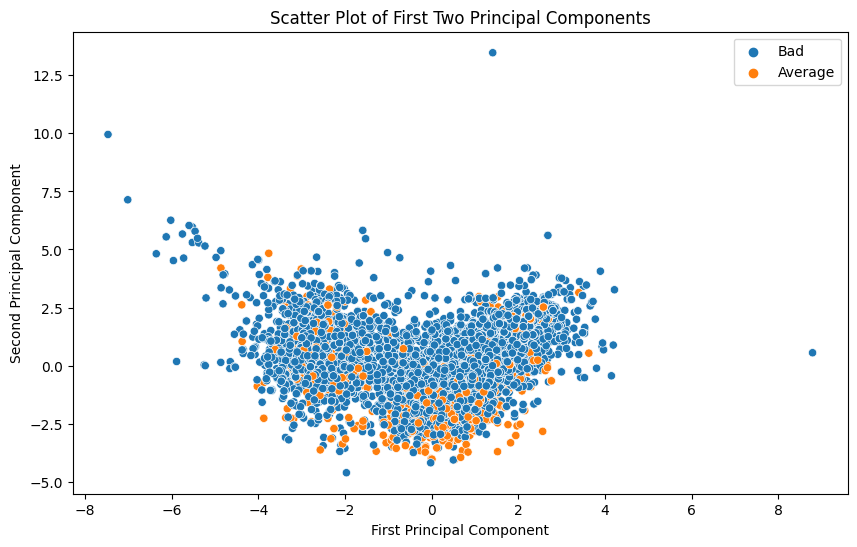

In [149]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have imported the required libraries and loaded the data.

sc = StandardScaler()
x_scaled = sc.fit_transform(x)

pca = PCA(n_components=None)  # Set n_components to None to capture all components
x_pca = pca.fit_transform(x_scaled)

variance_ratios = pca.explained_variance_ratio_
cumulative_variance = 0.0
components_to_print = 0

for i, ratio in enumerate(variance_ratios):
    cumulative_variance += ratio
    components_to_print += 1
    print("Component {}: Variance Captured: {:.2%}, Cumulative Variance: {:.2%}".format(
        i + 1, ratio, cumulative_variance))

    if cumulative_variance >= 0.98:
        print("98% variance captured at Component:", components_to_print)
        break

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Scatter Plot of First Two Principal Components')
plt.legend()
plt.show()


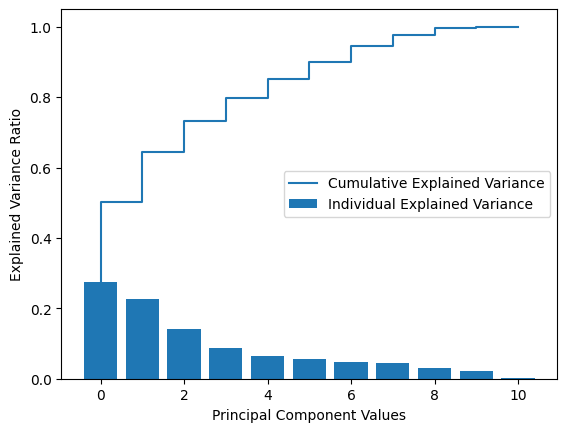

In [150]:
# Calculate the covariance matrix.
cova_matrix = np.cov(x_scaled, rowvar=False)

# Calculate eigenvalues and eigenvectors.
eignvalues, egnvectors = np.linalg.eigh(cova_matrix)

total_eignvalues = sum(eignvalues)
indiv_var_exp = [(i/total_eignvalues) for i in sorted(eignvalues, reverse=True)]

cumu_exp_var = np.cumsum(indiv_var_exp)

# Plot explained variance.
plt.bar(range(0, len(indiv_var_exp)), indiv_var_exp, label='Individual Explained Variance')
plt.step(range(0, len(cumu_exp_var)), cumu_exp_var, label='Cumulative Explained Variance')
plt.xlabel('Principal Component Values')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()


In [151]:
#AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data.
#we shall pick the first 8 components for our prediction.
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(x)

#**Splitting data**
**We split the data into training and testing sets using the train_test_split function from Scikit-learn. In this split, 25% of the data is allocated for testing, and the remaining 75% is used for training the model. This separation helps in evaluating the model's performance on unseen data.**

In [152]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.25)

In [153]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4847, 9)
(4847,)
(1616, 9)
(1616,)


In [154]:
y_train.value_counts()

Bad        3886
Average     961
Name: Reviews, dtype: int64

In [155]:
print(y_test.value_counts())

Bad        1306
Average     310
Name: Reviews, dtype: int64




---

#**Implementing models**

**In our first model, using Logistic Regression, we achieved an accuracy of 80.85% on the training data and 84.65% on the test data. Additionally, the area under the curve (AUC) for the test data was 81, indicating a good ability of the model to distinguish between the classes.**


---




In [156]:
#x_train.shape

Training Data - Confusion Matrix:
[[ 254  707]
 [ 170 3716]]

Training Data - Accuracy Score: 81.91%

Test Data - Confusion Matrix:
[[  57  253]
 [  48 1258]]

Test Data - Accuracy Score: 81.37%
              precision    recall  f1-score   support

     Average       0.54      0.18      0.27       310
         Bad       0.83      0.96      0.89      1306

    accuracy                           0.81      1616
   macro avg       0.69      0.57      0.58      1616
weighted avg       0.78      0.81      0.77      1616



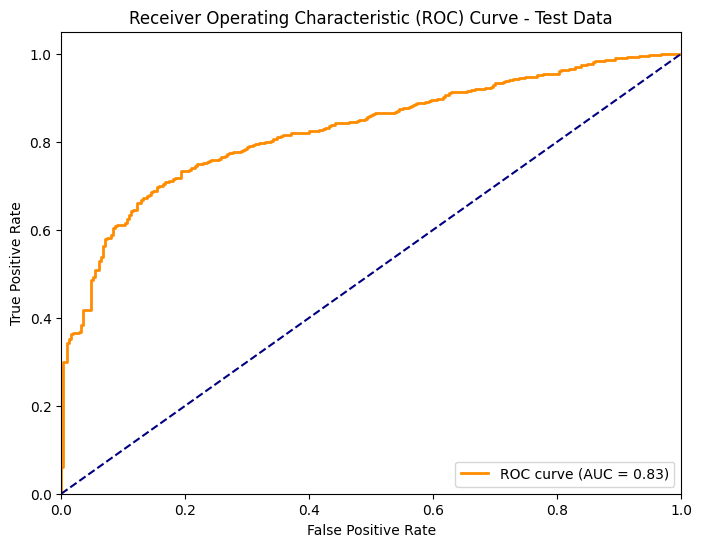

Execution Time: 0.8307387828826904 seconds


In [157]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import time
import matplotlib.pyplot as plt

def main():
    # Get the current time before executing the code
    start_time = time.time()

    # Create a Logistic Regression classifier.
    lr = LogisticRegression()

    # Train the classifier on the training data.
    lr.fit(x_train, y_train)

    # Use the trained model to make predictions on the training data.
    lr_train_predict = lr.predict(x_train)

    # Calculate the confusion matrix for the training data.
    lr_train_conf_matrix = confusion_matrix(y_train, lr_train_predict)

    # Calculate the accuracy score for the training data.
    lr_train_acc_score = accuracy_score(y_train, lr_train_predict)

    # Print the confusion matrix and accuracy score for the training data.
    print("Training Data - Confusion Matrix:")
    print(lr_train_conf_matrix)
    print("\nTraining Data - Accuracy Score: {:.2f}%".format(lr_train_acc_score * 100))

    # Use the trained model to make predictions on the test data.
    lr_test_predict = lr.predict(x_test)

    # Calculate the confusion matrix for the test data.
    lr_test_conf_matrix = confusion_matrix(y_test, lr_test_predict)

    # Calculate the accuracy score for the test data.
    lr_test_acc_score = accuracy_score(y_test, lr_test_predict)

    # Print the confusion matrix and accuracy score for the test data.
    print("\nTest Data - Confusion Matrix:")
    print(lr_test_conf_matrix)
    print("\nTest Data - Accuracy Score: {:.2f}%".format(lr_test_acc_score * 100))
    print(classification_report(y_test, lr_test_predict))

    # Calculate predicted probabilities for class 'Bad' (positive class) for test data
    lr_test_probabilities = lr.predict_proba(x_test)[:, 1]

    # Calculate the ROC curve and AUC for test data.
    fpr, tpr, thresholds = roc_curve(y_test, lr_test_probabilities, pos_label='Bad')
    roc_auc = roc_auc_score(y_test, lr_test_probabilities)

    # Plot the ROC curve for test data.
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
    plt.legend(loc='lower right')
    plt.show()

    # Calculate predicted probabilities for class 'Bad' (positive class) for training data
    lr_train_probabilities = lr.predict_proba(x_train)[:, 1]

    # Calculate the ROC curve and AUC for training data.
    #fpr_train, tpr_train, thresholds_train = roc_curve(y_train, lr_train_probabilities, pos_label='Bad')
    #roc_auc_train = roc_auc_score(y_train, lr_train_probabilities)

    # Plot the ROC curve for training data.
    #plt.figure(figsize=(8, 6))
    #plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_train))
    #plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
    #plt.legend(loc='lower right')
    #plt.show()

    # Get the current time after executing the code
    end_time = time.time()
    # Calculate and print the execution time
    execution_time = end_time - start_time
    print("Execution Time:", execution_time, "seconds")

# Call the main function
main()




---

#**DecisionTree**

**In the subsequent model iteration, we implemented a Decision Tree classifier. However, a clear issue of overfitting surfaced. To address this concern, we employed two techniques: adjusting class weights and utilizing a grid search approach. While the class weight technique managed to mitigate the overfitting problem, it led to an accuracy level of approximately 59.53%, accompanied by a ROC area of 0.75 On the other hand, the application of the alternate technique yielded a noteworthy enhancement in test accuracy, reaching around 82.80%, and demonstrated a corresponding ROC area of about 0.82.**


---




Cross Validation Scores (5 folds): [0.60824742 0.56391753 0.58410733 0.59236326 0.5748194 ]
Mean Cross Validation Score: 0.5846909876267381
Training Data - Decision Tree - Confusion Matrix:
[[ 852  109]
 [1883 2003]]

Training Data - Decision Tree - Accuracy Score: 58.90%

Test Data - Decision Tree - Confusion Matrix:
[[276  34]
 [620 686]]
Test Data - Decision Tree - Accuracy Score: 59.53%


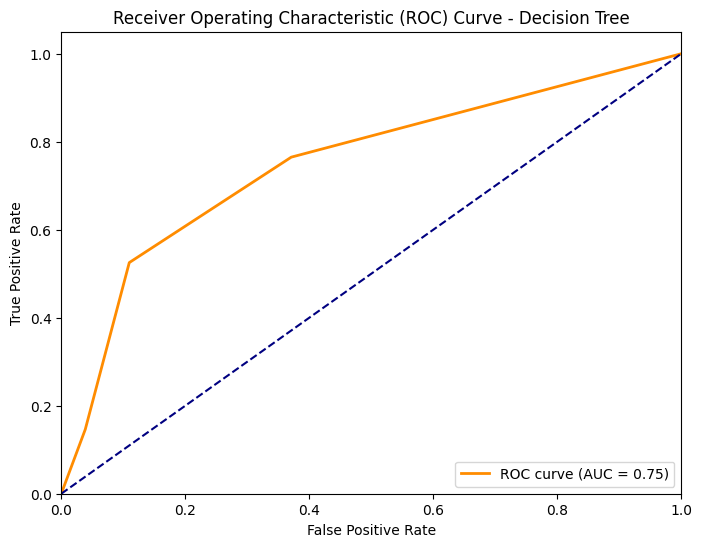

Execution Time: 0.8843646049499512 seconds


In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import time
import matplotlib.pyplot as plt

def main():
    # Get the current time before executing the code
    start_time = time.time()

    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Compute class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
    class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

    # Create a Decision Tree classifier with class weights
    dt_classifier = DecisionTreeClassifier(ccp_alpha=0.01, class_weight=class_weight_dict)

    # Perform cross-validation on the training data
    cross_val_scores = cross_val_score(dt_classifier, x_train, y_train_encoded, cv=5)
    print("Cross Validation Scores (5 folds):", cross_val_scores)
    print("Mean Cross Validation Score:", cross_val_scores.mean())

    # Train the classifier on the training data
    dt_classifier.fit(x_train, y_train_encoded)

    # Use the trained model to make predictions on the training data
    dt_train_predict = dt_classifier.predict(x_train)
    dt_train_conf_matrix = confusion_matrix(y_train_encoded, dt_train_predict)
    dt_train_acc_score = accuracy_score(y_train_encoded, dt_train_predict)
    print("Training Data - Decision Tree - Confusion Matrix:")
    print(dt_train_conf_matrix)
    print("\nTraining Data - Decision Tree - Accuracy Score: {:.2f}%".format(dt_train_acc_score * 100))

    # Use the trained model to make predictions on the test data
    dt_test_predict = dt_classifier.predict(x_test)
    dt_test_conf_matrix = confusion_matrix(y_test_encoded, dt_test_predict)
    dt_test_acc_score = accuracy_score(y_test_encoded, dt_test_predict)
    print("\nTest Data - Decision Tree - Confusion Matrix:")
    print(dt_test_conf_matrix)
    print("Test Data - Decision Tree - Accuracy Score: {:.2f}%".format(dt_test_acc_score * 100))

    # Calculate predicted probabilities for class 1 (positive class)
    dt_test_probabilities = dt_classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_encoded, dt_test_probabilities)
    roc_auc = roc_auc_score(y_test_encoded, dt_test_probabilities)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
    plt.legend(loc='lower right')
    plt.show()

    # Get the current time after executing the code
    end_time = time.time()
    # Calculate and print the execution time
    execution_time = end_time - start_time
    print("Execution Time:", execution_time, "seconds")

# Call the main function
main()


Training Data - Decision Tree - Confusion Matrix:
[[ 480  481]
 [ 204 3682]]

Training Data - Decision Tree - Accuracy Score: 85.87%

Test Data - Decision Tree - Confusion Matrix:
[[ 116  194]
 [  84 1222]]
Test Data - Decision Tree - Accuracy Score: 82.80%


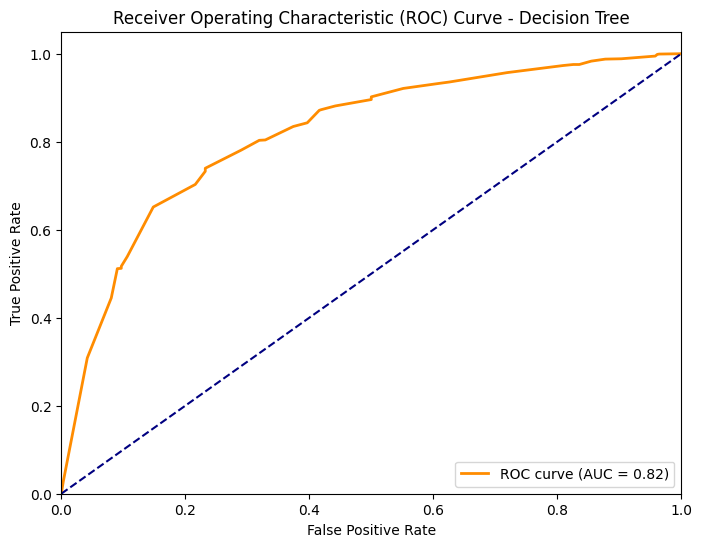

Execution Time: 5.895522594451904 seconds


In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import time
import matplotlib.pyplot as plt
import numpy as np

def main():
    start_time = time.time()
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    dt_classifier = DecisionTreeClassifier() # Initialize without hyperparameters

    param_grid = {
        'ccp_alpha': [0.001, 0.01, 0.1],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10]
    }

    grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
    grid_search.fit(x_train, y_train_encoded)

    # Using the best estimator found by GridSearchCV
    best_model = grid_search.best_estimator_

    dt_train_predict = best_model.predict(x_train)
    dt_train_conf_matrix = confusion_matrix(y_train_encoded, dt_train_predict)
    dt_train_acc_score = accuracy_score(y_train_encoded, dt_train_predict)
    print("Training Data - Decision Tree - Confusion Matrix:")
    print(dt_train_conf_matrix)
    print("\nTraining Data - Decision Tree - Accuracy Score: {:.2f}%".format(dt_train_acc_score * 100))

    dt_test_predict = best_model.predict(x_test)
    dt_test_conf_matrix = confusion_matrix(y_test_encoded, dt_test_predict)
    dt_test_acc_score = accuracy_score(y_test_encoded, dt_test_predict)
    print("\nTest Data - Decision Tree - Confusion Matrix:")
    print(dt_test_conf_matrix)
    print("Test Data - Decision Tree - Accuracy Score: {:.2f}%".format(dt_test_acc_score * 100))

    dt_test_probabilities = best_model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_encoded, dt_test_probabilities)
    roc_auc = roc_auc_score(y_test_encoded, dt_test_probabilities)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
    plt.legend(loc='lower right')
    plt.show()

    print("Execution Time:", time.time() - start_time, "seconds")

main()


In [160]:
x_train.shape

(4847, 9)



---

#**Naïve Bayes**
**Moving on to the subsequent model, we implemented the Naive Bayes classifier. Impressively, this model achieved an accuracy of approximately 80.82%, coupled with a robust ROC area of 0.82.**



---




Training Data - Naive Bayes - Confusion Matrix:
[[ 371  590]
 [ 303 3583]]

Training Data - Naive Bayes - Accuracy Score: 81.58%

Test Data - Naive Bayes - Confusion Matrix:
[[ 102  208]
 [ 102 1204]]

Test Data - Naive Bayes - Accuracy Score: 80.82%


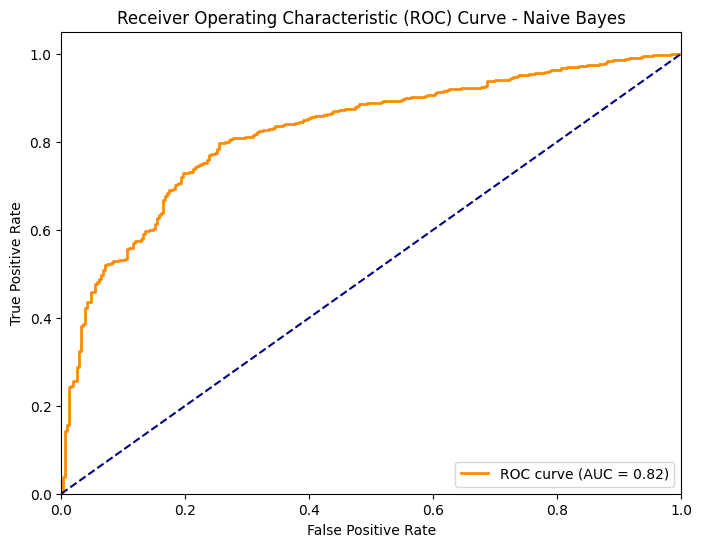

Execution Time: 0.3494272232055664 seconds


In [161]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import time
import matplotlib.pyplot as plt

def main():
    # Get the current time before executing the code
    start_time = time.time()

    # Create a Naive Bayes classifier.
    nb_classifier = GaussianNB()

    # Train the classifier on the training data.
    nb_classifier.fit(x_train, y_train)

    # Use the trained model to make predictions on the training data.
    nb_train_predict = nb_classifier.predict(x_train)

    # Calculate the confusion matrix for the training data.
    nb_train_conf_matrix = confusion_matrix(y_train, nb_train_predict)

    # Calculate the accuracy score for the training data.
    nb_train_acc_score = accuracy_score(y_train, nb_train_predict)

    # Print the confusion matrix and accuracy score for the training data.
    print("Training Data - Naive Bayes - Confusion Matrix:")
    print(nb_train_conf_matrix)
    print("\nTraining Data - Naive Bayes - Accuracy Score: {:.2f}%".format(nb_train_acc_score * 100))

    # Use the trained model to make predictions on the test data.
    nb_test_predict = nb_classifier.predict(x_test)

    # Calculate the confusion matrix for the test data.
    nb_test_conf_matrix = confusion_matrix(y_test, nb_test_predict)

    # Calculate the accuracy score for the test data.
    nb_test_acc_score = accuracy_score(y_test, nb_test_predict)

    # Print the confusion matrix and accuracy score for the test data.
    print("\nTest Data - Naive Bayes - Confusion Matrix:")
    print(nb_test_conf_matrix)
    print("\nTest Data - Naive Bayes - Accuracy Score: {:.2f}%".format(nb_test_acc_score * 100))

    # Convert string labels to numerical labels for ROC curve calculation
    label_mapping = {'Average': 0, 'Bad': 1}
    y_test_numeric = [label_mapping[label] for label in y_test]

    # Calculate predicted probabilities for class 1 (positive class)
    nb_test_probabilities = nb_classifier.predict_proba(x_test)[:, 1]

    # Calculate the ROC curve and AUC.
    fpr, tpr, thresholds = roc_curve(y_test_numeric, nb_test_probabilities)
    roc_auc = roc_auc_score(y_test_numeric, nb_test_probabilities)

    # Plot the ROC curve.
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
    plt.legend(loc='lower right')
    plt.show()

    # Get the current time after executing the code
    end_time = time.time()
    # Calculate and print the execution time
    execution_time = end_time - start_time
    print("Execution Time:", execution_time, "seconds")

# Call the main function
main()




---
#**Random Forest**
**In the following model iteration, we employed the Random Forest classifier, integrating two distinct techniques: feature engineering and cross-validation. Through feature engineering, the model identified crucial attributes, namely volatile acidity, citric acid, free sulfur dioxide, residual sugar, chlorides, pH, total sulfur dioxide and fixed acidity. This strategic selection led to an impressive accuracy of approximately 88.12%, accompanied by a robust ROC area of 0.91. Meanwhile, leveraging cross-validation yielded in accuracy, pushing it to around 88%, while maintaining the notable ROC area of 0.91.**






---



In [162]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Record the start time
start_time = time.time()
# Manually define the feature names as a list.
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

# Create a Random Forest classifier.
rf_classifier = RandomForestClassifier()

# Perform cross-validation on the training data.
cv_scores = cross_val_score(rf_classifier, x_train, y_train, cv=5)  # You can change 'cv' value to choose the number of folds.

# Print the cross-validation scores.
print("Cross-Validation Scores: ", cv_scores)
print("Mean Cross-Validation Accuracy: {:.2f}%".format(cv_scores.mean() * 100))
print("Standard Deviation of Cross-Validation Accuracy: {:.2f}".format(cv_scores.std()))

# Train the classifier on the full training data.
rf_classifier.fit(x_train, y_train)

# Feature selection using importances
importances = rf_classifier.feature_importances_

# Print feature importances sorted in descending order.
print("\nFeature Importances:")
for feature_name, importance in sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True):
    print(f"{feature_name}: {importance:.4f}")

# Use the feature importances to select top 'k' features, where 'k' is the number of features you want to keep.
# Assuming you want to keep the top 10 features:
k = 10
top_features_indices = importances.argsort()[-k:][::-1]  # Get indices of top 'k' features
top_features_names = [feature_names[i] for i in top_features_indices]

# Update the training and test data to include only the selected features.
x_train_selected = x_train[:, top_features_indices]
x_test_selected = x_test[:, top_features_indices]

# Train the classifier on the selected training data.
rf_classifier.fit(x_train_selected, y_train)

# Use the trained model to make predictions on the test data.
rf_test_predict = rf_classifier.predict(x_test_selected)

# Calculate the confusion matrix for the test data.
rf_test_conf_matrix = confusion_matrix(y_test, rf_test_predict)

# Calculate the accuracy score for the test data.
rf_test_acc_score = accuracy_score(y_test, rf_test_predict)

# Print the confusion matrix and accuracy score for the test data.
print("\nTest Data - Random Forest - Confusion Matrix:")
print(rf_test_conf_matrix)
print("\nTest Data - Random Forest - Accuracy Score: {:.2f}%".format(rf_test_acc_score * 100))
# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.6f} seconds")




Cross-Validation Scores:  [0.87010309 0.87731959 0.87409701 0.85964912 0.87100103]
Mean Cross-Validation Accuracy: 87.04%
Standard Deviation of Cross-Validation Accuracy: 0.01

Feature Importances:
volatile acidity: 0.1794
citric acid: 0.1197
free sulfur dioxide: 0.1183
chlorides: 0.1080
residual sugar: 0.1024
pH: 0.1005
density: 0.0924
fixed acidity: 0.0906
total sulfur dioxide: 0.0889

Test Data - Random Forest - Confusion Matrix:
[[ 156  154]
 [  38 1268]]

Test Data - Random Forest - Accuracy Score: 88.12%
Elapsed time: 10.017039 seconds


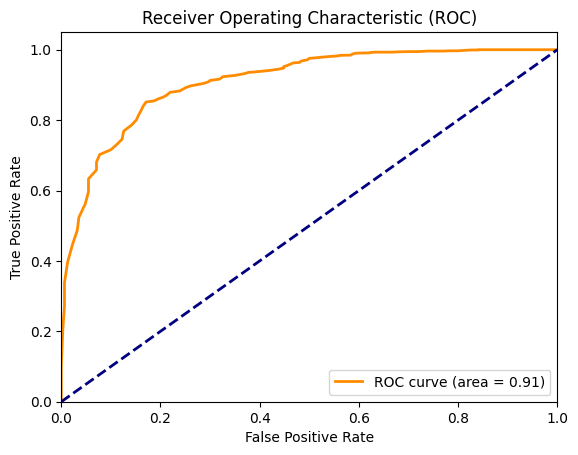

In [163]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Transform the labels into numerical values
label_encoder = LabelEncoder()
y_test_numerical = label_encoder.fit_transform(y_test)
y_train_numerical = label_encoder.transform(y_train)

# Train the Random Forest classifier on the numerical labels
rf_classifier.fit(x_train, y_train_numerical)

# Predict probabilities for the positive class
y_prob = rf_classifier.predict_proba(x_test)[:, 1]

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test_numerical, y_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Cross-Validation Scores:  [0.85773196 0.87835052 0.88453608 0.88453608 0.88247423 0.88247423
 0.88247423 0.86157025 0.88842975 0.85330579]
Mean Cross-Validation Accuracy: 87.56%
Standard Deviation of Cross-Validation Accuracy: 0.01

Test Data - Random Forest - Confusion Matrix:
[[ 155  155]
 [  39 1267]]

Test Data - Random Forest - Accuracy Score: 88.00%


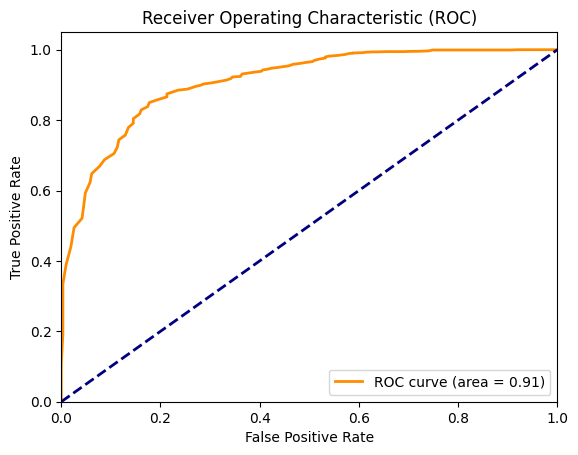

Elapsed time: 17.761893 seconds


In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Record the start time
start_time = time.time()

# Create a Random Forest classifier.
rf_classifier = RandomForestClassifier()

# Perform cross-validation on the training data.
cv_scores = cross_val_score(rf_classifier, x_train, y_train, cv=10)  # You can change 'cv' value to choose the number of folds.

# Print the cross-validation scores.
print("Cross-Validation Scores: ", cv_scores)
print("Mean Cross-Validation Accuracy: {:.2f}%".format(cv_scores.mean() * 100))
print("Standard Deviation of Cross-Validation Accuracy: {:.2f}".format(cv_scores.std()))

# Train the classifier on the full training data.
rf_classifier.fit(x_train, y_train)

# Use the trained model to make predictions on the test data.
rf_test_predict = rf_classifier.predict(x_test)

# Calculate the confusion matrix for the test data.
rf_test_conf_matrix = confusion_matrix(y_test, rf_test_predict)

# Calculate the accuracy score for the test data.
rf_test_acc_score = accuracy_score(y_test, rf_test_predict)

# Print the confusion matrix and accuracy score for the test data.
print("\nTest Data - Random Forest - Confusion Matrix:")
print(rf_test_conf_matrix)
print("\nTest Data - Random Forest - Accuracy Score: {:.2f}%".format(rf_test_acc_score * 100))
# Transform the labels into numerical values
label_encoder = LabelEncoder()
y_test_numerical = label_encoder.fit_transform(y_test)
y_train_numerical = label_encoder.transform(y_train)

# Train the Random Forest classifier on the numerical labels
rf_classifier.fit(x_train, y_train_numerical)

# Predict probabilities for the positive class
y_prob = rf_classifier.predict_proba(x_test)[:, 1]

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test_numerical, y_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.6f} seconds")


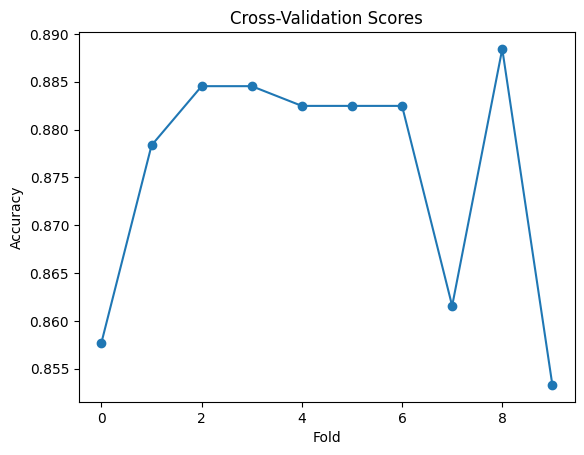

In [165]:
import matplotlib.pyplot as plt

plt.plot(cv_scores, marker='o')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

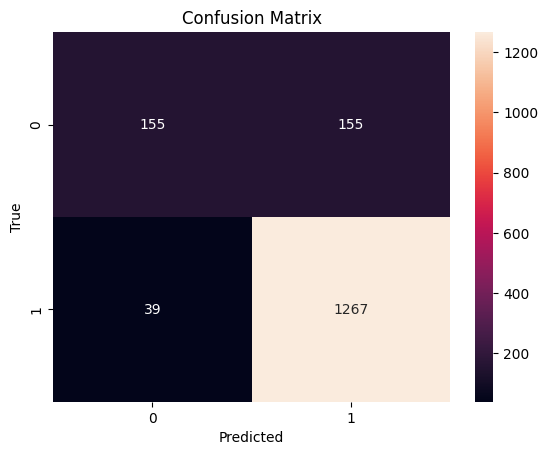

In [166]:
import seaborn as sns

sns.heatmap(rf_test_conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



---
#**SVM: Linear Kernel, RBF Kernel**
**For the SVM model, we harnessed two distinct techniques: the Linear kernel and the RBF kernel. With the Linear kernel, the model achieved an accuracy of approximately 80.82%, accompanied by an area under the ROC curve (AUC) of 0.74. Subsequently, the RBF kernel was introduced, showcasing a slight enhancement in performance with an accuracy of around 83.85% and a ROC area of 0.84.**





---




Training Data - SVM with Linear Kernel - Confusion Matrix:
[[   0  961]
 [   0 3886]]

Training Data - SVM with Linear Kernel - Accuracy Score: 80.17%

Cross-Validation Scores:  [0.80206186 0.80103093 0.80185759 0.80185759 0.80185759]
Mean Cross-Validation Accuracy: 80.17%
Standard Deviation of Cross-Validation Accuracy: 0.00

Test Data - SVM with Linear Kernel - Confusion Matrix:
[[   0  310]
 [   0 1306]]

Test Data - SVM with Linear Kernel - Accuracy Score: 80.82%


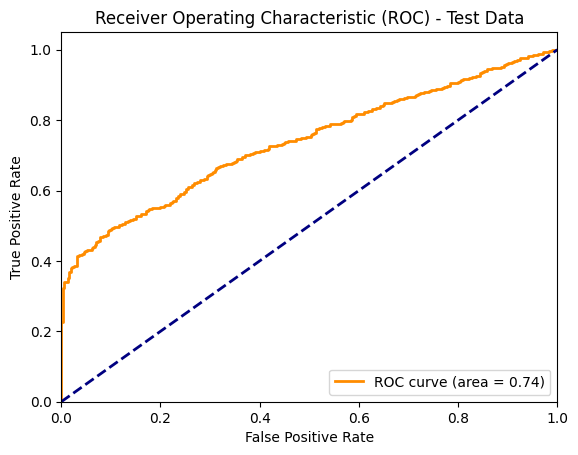

Elapsed time: 14.238765 seconds


In [167]:
import time
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Record the start time
start_time = time.time()

# Create a Support Vector Machine classifier with a linear kernel.
svm_classifier = SVC(kernel='linear', probability=True)

# Label encode the y_train and y_test
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the classifier on the full training data.
svm_classifier.fit(x_train, y_train_encoded)

# Use the trained model to make predictions on the training data.
svm_train_predict = svm_classifier.predict(x_train)

# Calculate the confusion matrix for the training data.
svm_train_conf_matrix = confusion_matrix(y_train_encoded, svm_train_predict)

# Calculate the accuracy score for the training data.
svm_train_acc_score = accuracy_score(y_train_encoded, svm_train_predict)

print("Training Data - SVM with Linear Kernel - Confusion Matrix:")
print(svm_train_conf_matrix)
print("\nTraining Data - SVM with Linear Kernel - Accuracy Score: {:.2f}%".format(svm_train_acc_score * 100))

# Use cross-validation on the training data.
cv_scores = cross_val_score(svm_classifier, x_train, y_train_encoded, cv=5)

print("\nCross-Validation Scores: ", cv_scores)
print("Mean Cross-Validation Accuracy: {:.2f}%".format(np.mean(cv_scores) * 100))
print("Standard Deviation of Cross-Validation Accuracy: {:.2f}".format(np.std(cv_scores)))

# Assuming 'top_features_indices' contains the indices of the top selected features.
x_train_selected = x_train[:, top_features_indices]
x_test_selected = x_test[:, top_features_indices]

# Train the classifier on the selected training data.
svm_classifier.fit(x_train_selected, y_train_encoded)

# Use the trained model to make predictions on the test data.
svm_test_predict = svm_classifier.predict(x_test_selected)

# Calculate the confusion matrix for the test data.
svm_test_conf_matrix = confusion_matrix(y_test_encoded, svm_test_predict)

# Calculate the accuracy score for the test data.
svm_test_acc_score = accuracy_score(y_test_encoded, svm_test_predict)

print("\nTest Data - SVM with Linear Kernel - Confusion Matrix:")
print(svm_test_conf_matrix)
print("\nTest Data - SVM with Linear Kernel - Accuracy Score: {:.2f}%".format(svm_test_acc_score * 100))

# Get decision function scores
svm_test_scores = svm_classifier.decision_function(x_test_selected)

# Identify the positive label
positive_label = label_encoder.transform(['Bad'])[0]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_encoded, svm_test_scores, pos_label=positive_label)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Data')
plt.legend(loc='lower right')
plt.show()

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.6f} seconds")


Training Data - SVM with RBF Kernel - Confusion Matrix:
[[ 260  689]
 [ 104 3794]]

Training Data - SVM with RBF Kernel - Accuracy Score: 83.64%

Cross-Validation Scores:  [0.82164948 0.82268041 0.82662539 0.82249742 0.82868937]
Mean Cross-Validation Accuracy: 82.44%
Standard Deviation of Cross-Validation Accuracy: 0.00

Test Data - SVM with RBF Kernel - Confusion Matrix:
[[  92  230]
 [  31 1263]]

Test Data - SVM with RBF Kernel - Accuracy Score: 83.85%


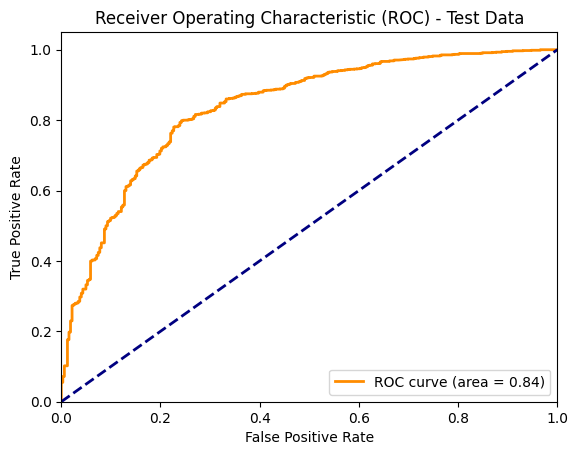

Elapsed time: 18.535689 seconds


In [130]:
import time
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Record the start time
start_time = time.time()

# Create a Support Vector Machine classifier with RBF kernel.
svm_classifier = SVC(kernel='rbf', probability=True)  # Adding the 'probability=True' parameter

# Train the classifier on the full training data.
svm_classifier.fit(x_train, y_train)

# Use the trained model to make predictions on the training data.
svm_train_predict = svm_classifier.predict(x_train)

# Calculate the confusion matrix for the training data.
svm_train_conf_matrix = confusion_matrix(y_train, svm_train_predict)

# Calculate the accuracy score for the training data.
svm_train_acc_score = accuracy_score(y_train, svm_train_predict)

print("Training Data - SVM with RBF Kernel - Confusion Matrix:")
print(svm_train_conf_matrix)
print("\nTraining Data - SVM with RBF Kernel - Accuracy Score: {:.2f}%".format(svm_train_acc_score * 100))

# Use cross-validation on the training data.
cv_scores = cross_val_score(svm_classifier, x_train, y_train, cv=5)  # You can change 'cv' value to choose the number of folds.

print("\nCross-Validation Scores: ", cv_scores)
print("Mean Cross-Validation Accuracy: {:.2f}%".format(np.mean(cv_scores) * 100))
print("Standard Deviation of Cross-Validation Accuracy: {:.2f}".format(np.std(cv_scores)))

# Update the training and test data to include only the selected features.
x_train_selected = x_train[:, top_features_indices]
x_test_selected = x_test[:, top_features_indices]

# Train the classifier on the selected training data.
svm_classifier.fit(x_train_selected, y_train)

# Use the trained model to make predictions on the test data.
svm_test_predict = svm_classifier.predict(x_test_selected)

# Calculate the confusion matrix for the test data.
svm_test_conf_matrix = confusion_matrix(y_test, svm_test_predict)

# Calculate the accuracy score for the test data.
svm_test_acc_score = accuracy_score(y_test, svm_test_predict)

print("\nTest Data - SVM with RBF Kernel - Confusion Matrix:")
print(svm_test_conf_matrix)
print("\nTest Data - SVM with RBF Kernel - Accuracy Score: {:.2f}%".format(svm_test_acc_score * 100))

# Get the probability scores for the test data
svm_test_scores = svm_classifier.predict_proba(x_test_selected)[:, 1]  # Assuming 'Bad' is the positive class

# Label encode the y_test
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_encoded, svm_test_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Data')
plt.legend(loc='lower right')
plt.show()

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.6f} seconds")




---
#**Neural Network:**
**Utilizing the Keras framework, we establish a neural network model comprising three layers. These layers consist of two hidden layers with 128 and 64 units respectively, employing the ReLU (Rectified Linear Unit) activation function. The output layer's unit count corresponds to the classes in the classification problem, and it employs the SoftMax activation function.
Furthermore, we assess the model employing two distinct approaches: one without cross-validation and the other with cross-validation. When excluding cross-validation, our model achieves an accuracy of approximately 82.36%. In contrast, employing cross-validation results in a performance boost, yielding an accuracy of around 85%. This comparison highlights the impact of cross-validation in enhancing the model's predictive capabilities.**



Epoch 1/8
122/122 [==============================] - 2s 4ms/step - loss: 0.4200 - accuracy: 0.8120 - val_loss: 0.3777 - val_accuracy: 0.8299
Epoch 2/8
122/122 [==============================] - 0s 3ms/step - loss: 0.3827 - accuracy: 0.8223 - val_loss: 0.3687 - val_accuracy: 0.8309
Epoch 3/8
122/122 [==============================] - 0s 3ms/step - loss: 0.3716 - accuracy: 0.8236 - val_loss: 0.3642 - val_accuracy: 0.8289
Epoch 4/8
122/122 [==============================] - 0s 3ms/step - loss: 0.3642 - accuracy: 0.8264 - val_loss: 0.3575 - val_accuracy: 0.8289
Epoch 5/8
122/122 [==============================] - 0s 3ms/step - loss: 0.3570 - accuracy: 0.8280 - val_loss: 0.3544 - val_accuracy: 0.8402
Epoch 6/8
122/122 [==============================] - 0s 3ms/step - loss: 0.3501 - accuracy: 0.8334 - val_loss: 0.3567 - val_accuracy: 0.8278
Epoch 7/8
122/122 [==============================] - 0s 3ms/step - loss: 0.3466 - accuracy: 0.8336 - val_loss: 0.3559 - val_accuracy: 0.8299
Epoch 8/8
51/

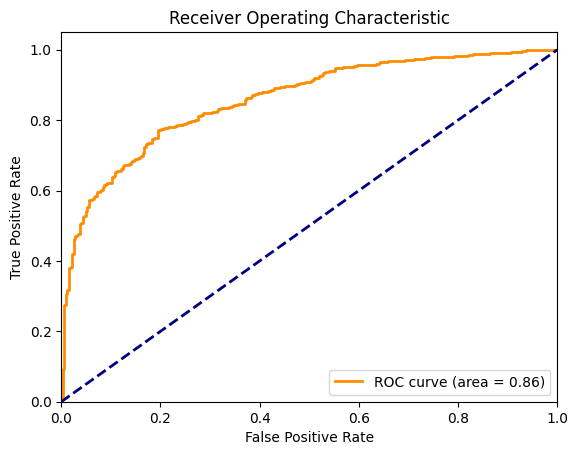

Elapsed time: 6.737362 seconds
Epoch 1/8
122/122 [==============================] - 2s 4ms/step - loss: 0.4357 - accuracy: 0.7962 - val_loss: 0.3912 - val_accuracy: 0.8155
Epoch 2/8
122/122 [==============================] - 0s 3ms/step - loss: 0.3770 - accuracy: 0.8264 - val_loss: 0.3797 - val_accuracy: 0.8309
Epoch 3/8
122/122 [==============================] - 0s 3ms/step - loss: 0.3715 - accuracy: 0.8264 - val_loss: 0.3761 - val_accuracy: 0.8330
Epoch 4/8
122/122 [==============================] - 0s 3ms/step - loss: 0.3624 - accuracy: 0.8305 - val_loss: 0.3738 - val_accuracy: 0.8361
Epoch 5/8
122/122 [==============================] - 0s 3ms/step - loss: 0.3575 - accuracy: 0.8311 - val_loss: 0.3674 - val_accuracy: 0.8351
Epoch 6/8
122/122 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.8357 - val_loss: 0.3638 - val_accuracy: 0.8258
Epoch 7/8
122/122 [==============================] - 0s 3ms/step - loss: 0.3473 - accuracy: 0.8378 - val_loss: 0.3790 - val

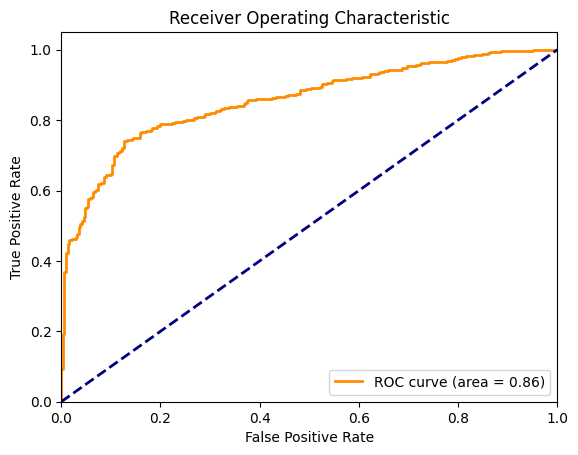

Elapsed time: 6.767228 seconds


In [168]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
# Record the start time
start_time = time.time()

# Encoding the labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Convert to one-hot encoding
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

# Define the neural network model
model = Sequential()
model.add(Dense(128, input_shape=(x_train_selected.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train_one_hot.shape[1], activation='softmax')) # Number of classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train_selected, y_train_one_hot, epochs=8, batch_size=32, validation_split=0.2)

# Use the trained model to make predictions on the test data
nn_test_predict_one_hot = model.predict(x_test_selected)
nn_test_predict = np.argmax(nn_test_predict_one_hot, axis=1)

# Reverse one-hot encoding for y_test
y_test_labels = np.argmax(y_test_one_hot, axis=1)

# Calculate the confusion matrix for the test data
nn_test_conf_matrix = confusion_matrix(y_test_labels, nn_test_predict)

# Calculate the accuracy score for the test data
nn_test_acc_score = accuracy_score(y_test_labels, nn_test_predict)

# Print the confusion matrix and accuracy score for the test data
print("\nTest Data - Neural Network - Confusion Matrix:")
print(nn_test_conf_matrix)
print("\nTest Data - Neural Network - Accuracy Score: {:.2f}%".format(nn_test_acc_score * 100))
# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Elapsed time: {elapsed_time:.6f} seconds")
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test_encoded, nn_test_predict_one_hot[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Elapsed time: {elapsed_time:.6f} seconds")


51/51 [==============================] - 0s 1ms/step
Fold 1: Accuracy = 0.83%
51/51 [==============================] - 0s 1ms/step
Fold 2: Accuracy = 0.83%
51/51 [==============================] - 0s 2ms/step
Fold 3: Accuracy = 0.84%
51/51 [==============================] - 0s 2ms/step
Fold 4: Accuracy = 0.82%
51/51 [==============================] - 0s 2ms/step
Fold 5: Accuracy = 0.84%
51/51 [==============================] - 0s 1ms/step
Fold 6: Accuracy = 0.83%
51/51 [==============================] - 0s 2ms/step
Fold 7: Accuracy = 0.84%


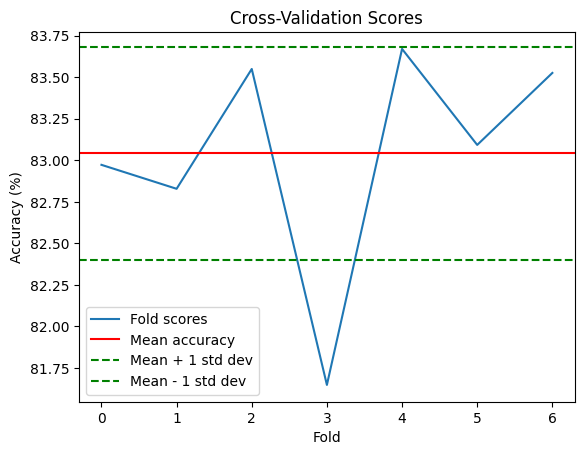

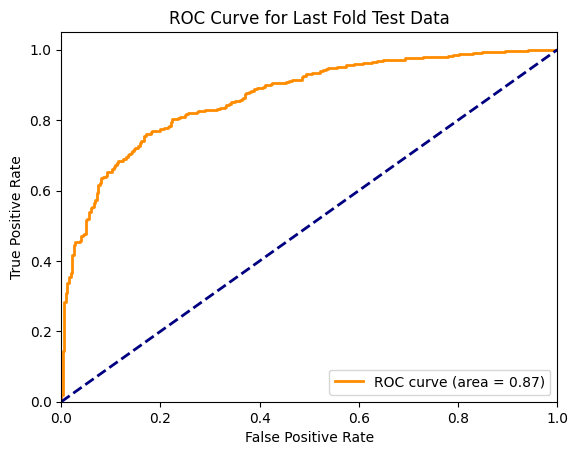

51/51 [==============================] - 0s 2ms/step
Confusion Matrix:
[[ 139  183]
 [  63 1231]]
Elapsed time: 35.773650 seconds
51/51 [==============================] - 0s 2ms/step
Fold 1: Accuracy = 0.83%
51/51 [==============================] - 0s 2ms/step
Fold 2: Accuracy = 0.81%
51/51 [==============================] - 0s 1ms/step
Fold 3: Accuracy = 0.83%
51/51 [==============================] - 0s 1ms/step
Fold 4: Accuracy = 0.81%
51/51 [==============================] - 0s 1ms/step
Fold 5: Accuracy = 0.83%
51/51 [==============================] - 0s 1ms/step
Fold 6: Accuracy = 0.84%
51/51 [==============================] - 0s 1ms/step
Fold 7: Accuracy = 0.85%


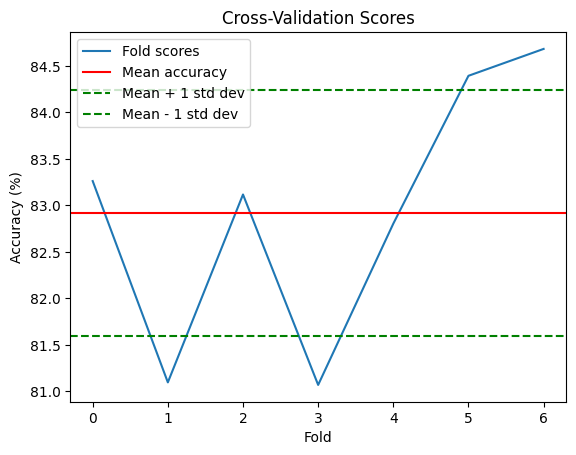

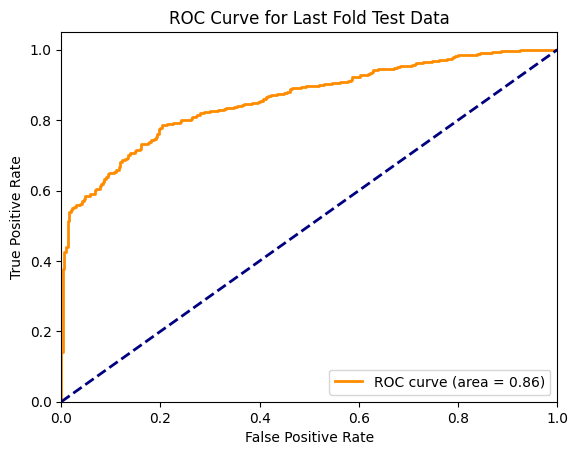

51/51 [==============================] - 0s 2ms/step
Confusion Matrix:
[[ 114  196]
 [  77 1229]]
Elapsed time: 33.549226 seconds


In [169]:
import time
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns

# Record the start time
start_time = time.time()

# Number of folds
n_folds = 7
kf = KFold(n_splits=n_folds, shuffle=True)

cv_scores = []
all_fpr = []
all_tpr = []

for fold, (train_index, val_index) in enumerate(kf.split(x_train_selected)):
    x_train_fold, x_val_fold = x_train_selected[train_index], x_train_selected[val_index]
    y_train_fold, y_val_fold = y_train_one_hot[train_index], y_train_one_hot[val_index]

    model = Sequential()
    model.add(Dense(128, input_shape=(x_train_selected.shape[1],), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(y_train_one_hot.shape[1], activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(x_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)

    _, accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    cv_scores.append(accuracy * 100)

    # Predict probabilities for the positive class (class 1)
    y_pred_prob = model.predict(x_test_selected)[:, 1]

    # If this is the last fold, plot ROC curve for the test data
    if fold == n_folds - 1:
        # Compute ROC curve
        fpr, tpr, _ = roc_curve(y_test_one_hot[:, 1], y_pred_prob)
        all_fpr.append(fpr)
        all_tpr.append(tpr)

    print(f"Fold {fold + 1}: Accuracy = {accuracy:.2f}%")

# Plotting the cross-validation scores
plt.plot(cv_scores, label="Fold scores")
plt.axhline(y=np.mean(cv_scores), color='r', linestyle='-', label="Mean accuracy")
plt.axhline(y=np.mean(cv_scores) + np.std(cv_scores), color='g', linestyle='--', label="Mean + 1 std dev")
plt.axhline(y=np.mean(cv_scores) - np.std(cv_scores), color='g', linestyle='--', label="Mean - 1 std dev")
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.title('Cross-Validation Scores')
plt.legend()
plt.show()

# Plotting the ROC curve for the last fold of test data
plt.figure()
roc_auc = auc(all_fpr[0], all_tpr[0])
plt.plot(all_fpr[0], all_tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Last Fold Test Data')
plt.legend(loc='lower right')
plt.show()

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(model.predict(x_test_selected), axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Print the confusion matrix
print('Confusion Matrix:')
print(conf_matrix)

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Elapsed time: {elapsed_time:.6f} seconds")




---
#**KNN**
**The k-nearest neighbors (k-NN) model demonstrates an accuracy of 81.56% when evaluated on the test dataset, accompanied by an area under the curve (ROC) of 82. This indicates the model's ability to classify and predict outcomes with relatively high precision and a strong discriminative capability.**


---




Cross-Validation Scores:  [0.84329897 0.83917526 0.81527348 0.8255934  0.85552116]
Mean Cross-Validation Accuracy: 83.58%
Standard Deviation of Cross-Validation Accuracy: 0.01

Training Data - k-NN - Confusion Matrix: [[ 581  368]
 [ 170 3728]]
Training Data - k-NN - Accuracy Score: 88.90%

Test Data - k-NN - Confusion Matrix: [[ 168  154]
 [ 102 1192]]
Test Data - k-NN - Accuracy Score: 84.16%


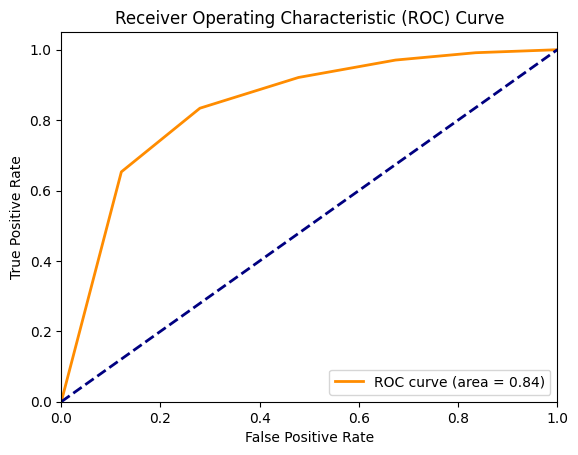

Elapsed time: 1.090525 seconds
Cross-Validation Scores:  [0.83092784 0.82886598 0.82868937 0.84932921 0.83178535]
Mean Cross-Validation Accuracy: 83.39%
Standard Deviation of Cross-Validation Accuracy: 0.01

Training Data - k-NN - Confusion Matrix: [[ 597  364]
 [ 158 3728]]
Training Data - k-NN - Accuracy Score: 89.23%

Test Data - k-NN - Confusion Matrix: [[ 154  156]
 [  83 1223]]
Test Data - k-NN - Accuracy Score: 85.21%


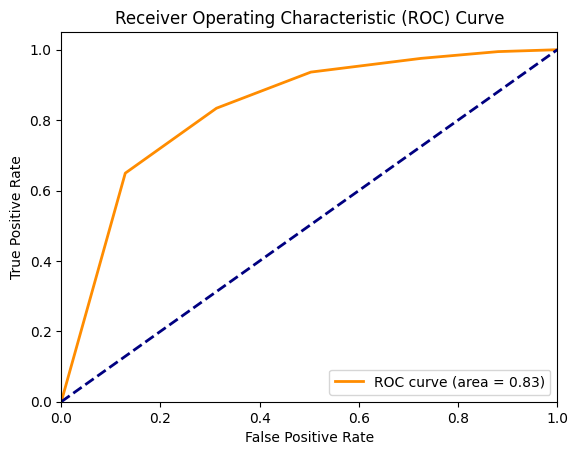

Elapsed time: 1.029211 seconds


In [170]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Record the start time
start_time = time.time()

# Convert y_train and y_test to binary form (0 and 1).
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train).ravel()
y_test_bin = lb.transform(y_test).ravel()

# Create a k-Nearest Neighbors classifier.
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Perform cross-validation on the training data.
cv_scores = cross_val_score(knn_classifier, x_train, y_train_bin, cv=5)

# Print the cross-validation scores.
print("Cross-Validation Scores: ", cv_scores)
print("Mean Cross-Validation Accuracy: {:.2f}%".format(cv_scores.mean() * 100))
print("Standard Deviation of Cross-Validation Accuracy: {:.2f}".format(cv_scores.std()))

# Train the classifier on the training data.
knn_classifier.fit(x_train, y_train_bin)

# Predictions, confusion matrix, and accuracy for training data.
knn_train_predict = knn_classifier.predict(x_train)
print("\nTraining Data - k-NN - Confusion Matrix:", confusion_matrix(y_train_bin, knn_train_predict))
print("Training Data - k-NN - Accuracy Score: {:.2f}%".format(accuracy_score(y_train_bin, knn_train_predict) * 100))

# Predictions, confusion matrix, and accuracy for test data.
knn_test_predict = knn_classifier.predict(x_test)
print("\nTest Data - k-NN - Confusion Matrix:", confusion_matrix(y_test_bin, knn_test_predict))
print("Test Data - k-NN - Accuracy Score: {:.2f}%".format(accuracy_score(y_test_bin, knn_test_predict) * 100))

# ROC plot
knn_test_predict_proba = knn_classifier.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_bin, knn_test_predict_proba)
roc_auc = roc_auc_score(y_test_bin, knn_test_predict_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Elapsed time: {elapsed_time:.6f} seconds")


#**LDA:**
**The final Linear Discriminant Analysis (LDA) model exhibits an accuracy of 80% when assessed against the test dataset, showcasing its proficiency in making accurate predictions. Additionally, the model achieves a noteworthy area under the ROC curve (AUC) of 0.90, signifying its strong ability to discriminate between classes and characterize the performance of the model's predictions.**



Cross-Validation Scores:  [0.81649485 0.82371134 0.80495356 0.81630547 0.81630547]
Mean Cross-Validation Accuracy: 81.56%
Standard Deviation of Cross-Validation Accuracy: 0.01

Training Data - LDA - Confusion Matrix: [[ 284  665]
 [ 219 3679]]
Training Data - LDA - Accuracy Score: 81.76%

Test Data - LDA - Confusion Matrix: [[ 102  220]
 [  69 1225]]
Test Data - LDA - Accuracy Score: 82.12%


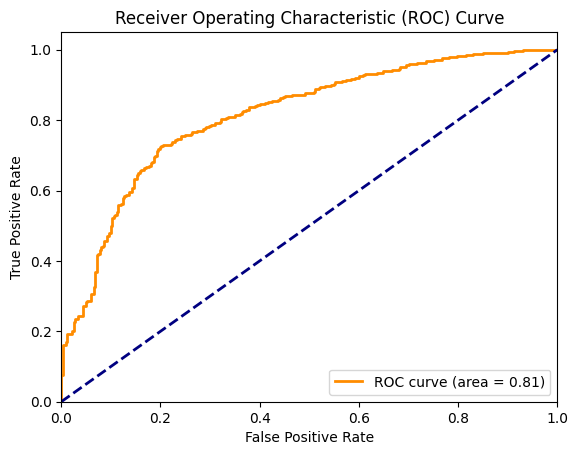

Elapsed time: 0.469782 seconds
Cross-Validation Scores:  [0.82371134 0.82989691 0.82868937 0.79772962 0.81630547]
Mean Cross-Validation Accuracy: 81.93%
Standard Deviation of Cross-Validation Accuracy: 0.01

Training Data - LDA - Confusion Matrix: [[ 300  661]
 [ 215 3671]]
Training Data - LDA - Accuracy Score: 81.93%

Test Data - LDA - Confusion Matrix: [[  80  230]
 [  68 1238]]
Test Data - LDA - Accuracy Score: 81.56%


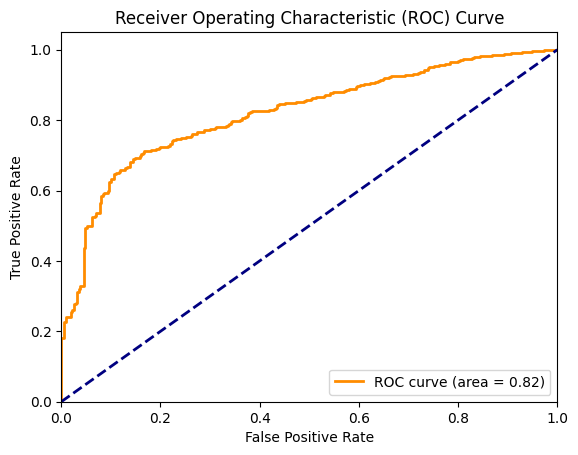

Elapsed time: 0.509414 seconds


In [171]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Record the start time
start_time = time.time()

# Convert y_train and y_test to binary form (0 and 1).
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train).ravel()
y_test_bin = lb.transform(y_test).ravel()

# Create a Linear Discriminant Analysis classifier.
lda_classifier = LinearDiscriminantAnalysis()

# Perform cross-validation on the training data.
cv_scores = cross_val_score(lda_classifier, x_train, y_train_bin, cv=5)

# Print the cross-validation scores.
print("Cross-Validation Scores: ", cv_scores)
print("Mean Cross-Validation Accuracy: {:.2f}%".format(cv_scores.mean() * 100))
print("Standard Deviation of Cross-Validation Accuracy: {:.2f}".format(cv_scores.std()))

# Train the classifier on the training data.
lda_classifier.fit(x_train, y_train_bin)

# Predictions, confusion matrix, and accuracy for training data.
lda_train_predict = lda_classifier.predict(x_train)
print("\nTraining Data - LDA - Confusion Matrix:", confusion_matrix(y_train_bin, lda_train_predict))
print("Training Data - LDA - Accuracy Score: {:.2f}%".format(accuracy_score(y_train_bin, lda_train_predict) * 100))

# Predictions, confusion matrix, and accuracy for test data.
lda_test_predict = lda_classifier.predict(x_test)
print("\nTest Data - LDA - Confusion Matrix:", confusion_matrix(y_test_bin, lda_test_predict))
print("Test Data - LDA - Accuracy Score: {:.2f}%".format(accuracy_score(y_test_bin, lda_test_predict) * 100))

# ROC plot
lda_test_predict_proba = lda_classifier.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_bin, lda_test_predict_proba)
roc_auc = roc_auc_score(y_test_bin, lda_test_predict_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Elapsed time: {elapsed_time:.6f} seconds")


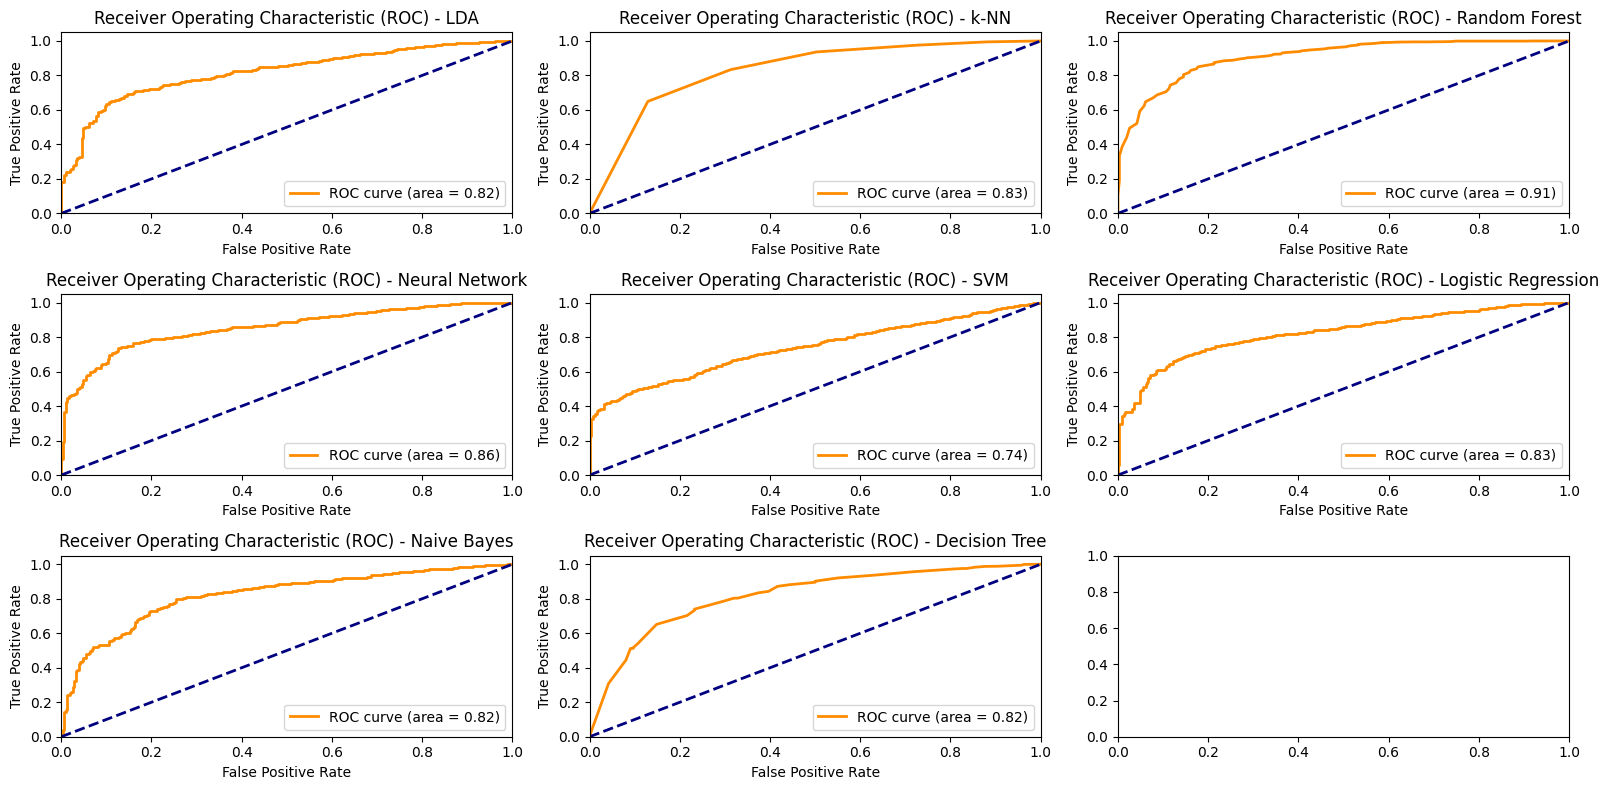

In [172]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

def plot_roc_curve(ax, fpr, tpr, roc_auc, classifier_name):
    ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'Receiver Operating Characteristic (ROC) - {classifier_name}')
    ax.legend(loc='lower right')

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(16, 8))

# LDA
lda_test_predict_proba = lda_classifier.predict_proba(x_test)[:, 1]
fpr_lda, tpr_lda, _ = roc_curve(y_test_bin, lda_test_predict_proba)
roc_auc_lda = roc_auc_score(y_test_bin, lda_test_predict_proba)
plot_roc_curve(axes[0, 0], fpr_lda, tpr_lda, roc_auc_lda, 'LDA')

# k-Nearest Neighbors
knn_test_predict_proba = knn_classifier.predict_proba(x_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_test_predict_proba, pos_label='Bad')
roc_auc_knn = roc_auc_score(y_test, knn_test_predict_proba)
plot_roc_curve(axes[0, 1], fpr_knn, tpr_knn, roc_auc_knn, 'k-NN')

# Random Forest
rf_test_predict_proba = rf_classifier.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_test_predict_proba, pos_label='Bad')
roc_auc_rf = roc_auc_score(y_test, rf_test_predict_proba)
plot_roc_curve(axes[0, 2], fpr_rf, tpr_rf, roc_auc_rf, 'Random Forest')

# Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test_encoded, nn_test_predict_one_hot[:, 1])
roc_auc_nn = auc(fpr_nn, tpr_nn)
plot_roc_curve(axes[1, 0], fpr_nn, tpr_nn, roc_auc_nn, 'Neural Network')

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test_encoded, svm_test_scores)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plot_roc_curve(axes[1, 1], fpr_svm, tpr_svm, roc_auc_svm, 'SVM')

# Logistic Regression
# Calculate predicted probabilities for class 'Bad' (positive class) for test data
# Define and fit the Logistic Regression model
lr = LogisticRegression()
lr.fit(x_train, y_train_encoded) # Assuming you have already preprocessed the data

# Now the rest of your code should work
lr_test_probabilities = lr.predict_proba(x_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_test_probabilities, pos_label='Bad')
roc_auc_lr = roc_auc_score(y_test, lr_test_probabilities)
plot_roc_curve(axes[1, 2], fpr_lr, tpr_lr, roc_auc_lr, 'Logistic Regression')

# Decision tree
#Define the parameter grid for grid search
dt_classifier = DecisionTreeClassifier()
param_grid = {
    'ccp_alpha': [0.001, 0.01, 0.1],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train_encoded)
best_model = grid_search.best_estimator_
dt_train_predict = best_model.predict(x_train)
dt_train_conf_matrix = confusion_matrix(y_train_encoded, dt_train_predict)
dt_train_acc_score = accuracy_score(y_train_encoded, dt_train_predict)

dt_test_probabilities = best_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_encoded, dt_test_probabilities)
roc_auc = roc_auc_score(y_test_encoded, dt_test_probabilities)
plot_roc_curve(axes[2, 1], fpr, tpr, roc_auc, 'Decision Tree')
plt.tight_layout()

#Naive Bayes
# Calculate predicted probabilities for class 1 (positive class)
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train_encoded)
#nb_test_probabilities = nb_classifier.predict_proba(x_test)[:, 1]

# Calculate the ROC curve and AUC.
nb_test_probabilities = nb_classifier.predict_proba(x_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test_encoded, nb_test_probabilities)
roc_auc_nb = roc_auc_score(y_test_encoded, nb_test_probabilities)
#plot_roc_curve(axes[2, 0], fpr_nb, tpr_nb, roc_auc_nb, 'Naive Bayes')

# Plot the ROC curve for Naive Bayes
plot_roc_curve(axes[2, 0], fpr_nb, tpr_nb, roc_auc_nb, 'Naive Bayes')

plt.show()


#**Result**
**Out of all the models we have compared in our projects. We have compared our models based on time it has taken and accuracy for the given target variable.
•	Random model gives best results using SMOTE sampling method where accuracy is 88.12% and time taken for model execution is 10 seconds.**
